In [1]:
from standardInclude import *
%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
#f = r.TFile("./data/energy_time_60hr_most.root")
f = r.TFile("./data/Energy_v_Time_KS_60h.root")
f.ls()

TFile**		./data/Energy_v_Time_KS_60h.root	
 TFile*		./data/Energy_v_Time_KS_60h.root	
  KEY: TCanvas	c1;1	c1


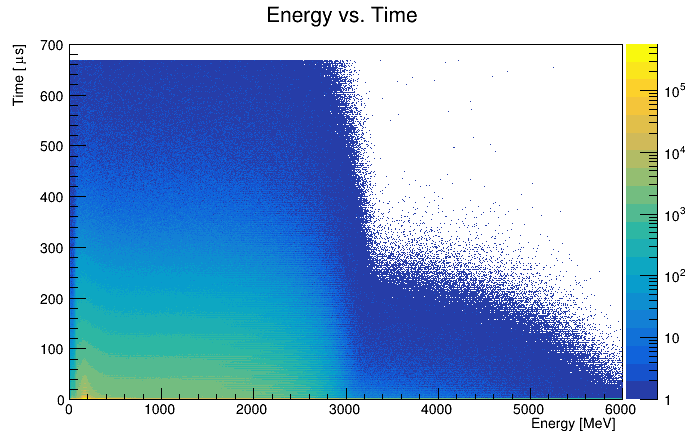

In [3]:
c1 = f.Get("c1")
c1.Draw()

In [4]:
c1.GetListOfPrimitives().Print()

Collection name='TList', class='TList', size=3
 TFrame  X1=0.000000 Y1=0.000000 X2=6000.000000 Y2=700.000000 FillStyle=1001
 TH1.Print Name  = h, Entries= -2147483648, Total sum= 8.07188e+09
 TPaveText  X1=1933.620674 Y1=729.735179 X2=4066.379326 Y2=783.125011
 Collection name='TList', class='TList', size=1
  Text  X=0.000000 Y=0.000000 Text=Energy vs. Time Font=0 Size=0.000000 Color=0 Align=0


In [5]:
evt =c1.GetPrimitive("h").Clone("evt")
evt.SetDirectory(0)

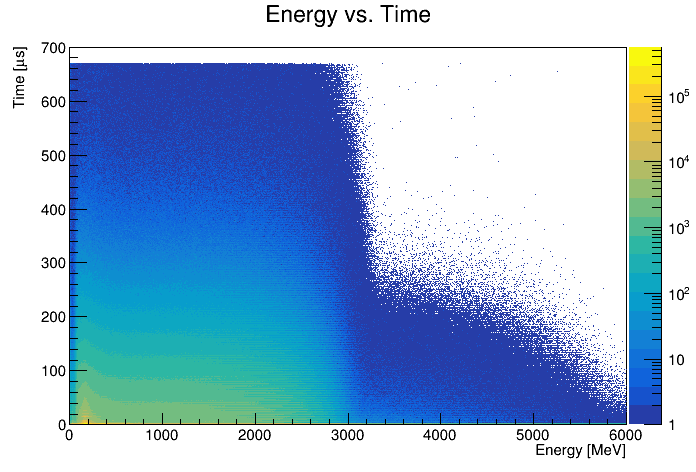

In [6]:
c2 = r.TCanvas()
evt.Draw("COLZ")
c2.SetLogz()
c2.Draw()

In [7]:
print(evt.GetNbinsX(),evt.GetNbinsY())
print("x:",evt.GetXaxis().GetXmin(), evt.GetXaxis().GetXmax())
print("y:",evt.GetYaxis().GetXmin(), evt.GetYaxis().GetXmax())

12000 4700
x: 0.0 6000.0
y: 0.0 700.0


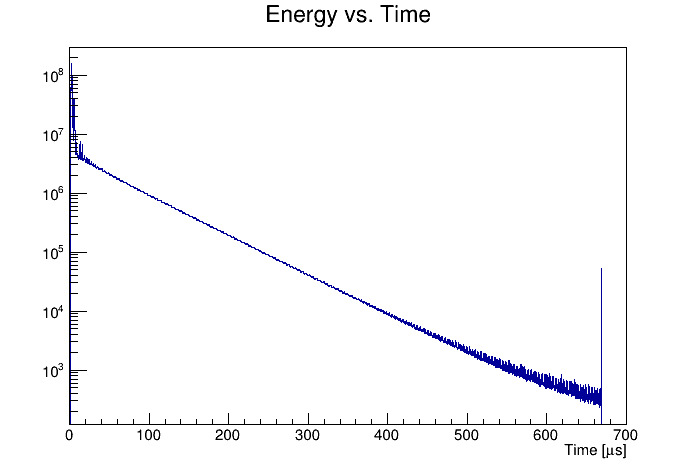

In [8]:
c2 = r.TCanvas()
evt.GetXaxis().SetRangeUser(0,700)
evt_time = evt.ProjectionY().Clone()
evt_time.Draw("COLZ")
c2.SetLogy()
c2.Draw()

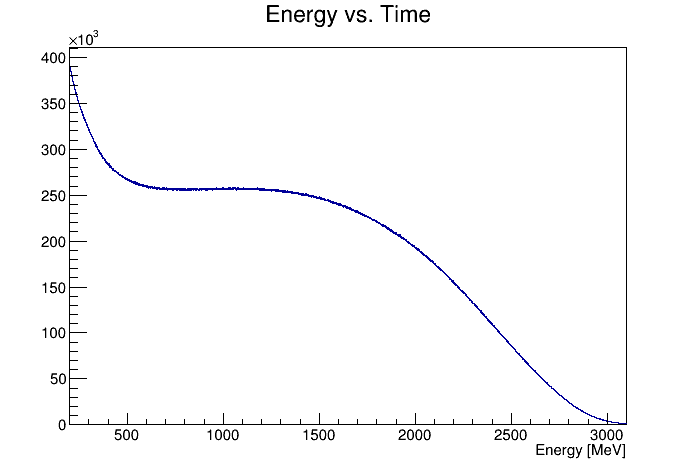

In [9]:
c2 = r.TCanvas()
e1 = 200 #200 and 3100 produced a stable result in the visualizer
e2 = 3100
t1 = 100
t2 = 400

t1global = t1
t2global = t2 

evt.GetXaxis().SetRangeUser(e1,e2)
evt.GetYaxis().SetRangeUser(30,600)

cuti = r.TCutG("cuti")
cuti.SetPoint(0,e1,t1)
cuti.SetPoint(1,e2,t1)
cuti.SetPoint(2,e2,t2)
cuti.SetPoint(3,e1,t2)
cuti.SetPoint(4,e1,t1)

h = evt.ProjectionX("h",0,-1,"[cuti]").Clone()
#h.Scale(1/(h.GetEntries()))
h.Draw()
c2.Draw()

In [10]:
timeBinWidth = evt_time.GetBinWidth(100)
timeBinCenters = []
for i in range(evt_time.GetNbinsX()):
    binCenter = evt_time.GetBinCenter(i)
    if(binCenter > t1 and binCenter < t2):
        timeBinCenters.append(binCenter)

In [11]:
timeBinWidth

0.14893617021276595

In [12]:
timeBinCenters[:10]

[100.01063829787235,
 100.15957446808511,
 100.30851063829788,
 100.45744680851064,
 100.6063829787234,
 100.75531914893617,
 100.90425531914893,
 101.05319148936171,
 101.20212765957447,
 101.35106382978724]

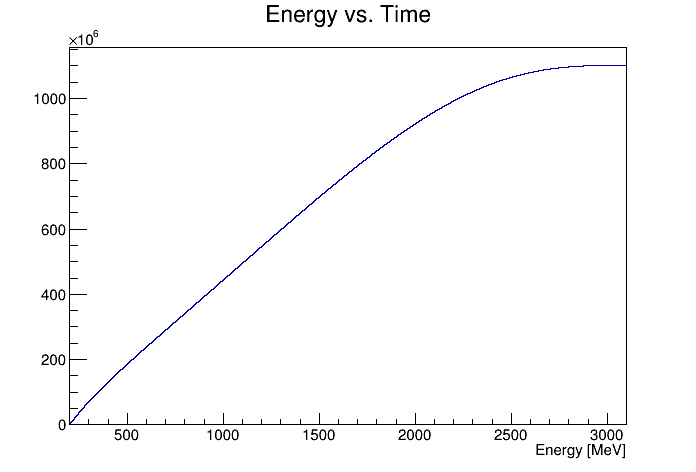

In [13]:
hcum = h.GetCumulative()
c2 = r.TCanvas()
hcum.Draw()
c2.Draw()

In [14]:
hscaled = h.Clone("hscaled")
hscaled.Scale(1/(hscaled.GetEntries()))

In [15]:
ndivs = len(timeBinCenters)
numberOfBins = 1
print(ndivs)
timeSlices = []
timeSlicesCum = []
times = []
for div in range(ndivs):
    t1 = timeBinCenters[div] - timeBinWidth*numberOfBins
    t2 = timeBinCenters[div] + timeBinWidth*numberOfBins
    evt.GetYaxis().SetRangeUser(t1,t2)
    
    cuti = r.TCutG("cuti")
    cuti.SetPoint(0,e1,t1)
    cuti.SetPoint(1,e2,t1)
    cuti.SetPoint(2,e2,t2)
    cuti.SetPoint(3,e1,t2)
    cuti.SetPoint(4,e1,t1)

    htemp = evt.ProjectionX("htemp",0,-1,"[cuti]").Clone()
    htemp.SetTitle("EvT Projection from Time Slice "+str(t1).zfill(3)+" - "+str(t2).zfill(3))
    #htemp.Scale(1/(htemp.GetEntries()))
    
    '''
    hprint = htemp.Clone("hprint")
    hprint.Scale(1/(hprint.GetEntries()))
    c = r.TCanvas("c","c",1000,1000)
    hscaled.Draw("HIST")
    hprint.SetLineColor(2)
    hprint.Draw("HIST SAME")
    hscaled.GetXaxis().SetRangeUser(0.0001,0.01)
    c.SetLogy()
    c.Draw()
    c.Print("./images/evt_"+str(div).zfill(5)+".png")
    '''
    
    timeSlices.append(htemp.Clone("h"+str(div+1)))
    timeSlicesCum.append(htemp.GetCumulative().Clone("hcum"+str(div+1)))
    times.append(t1)

2015


In [16]:
hscaledcum = hcum.Clone("hscaledcum")
#hscaled.Scale(1/(hscaled.GetEntries()))

for div in range(500):#ndivs):
    hprint = timeSlicesCum[div].Clone("hprint")
    #hprint.Scale(1/(hprint.GetEntries()))
    c = r.TCanvas("c","c",1000,1000)
    hscaledcum.Draw("HIST")
    hprint.SetLineColor(2)
    hprint.Draw("HIST SAME")
    #hscaled.GetXaxis().SetRangeUser(0.0001,0.01)
    c.SetLogy()
    c.Draw()
    #c.Print("./images/evt_cum_"+str(div).zfill(5)+".png")

In [17]:
ks = []
for i, hslice in enumerate(timeSlicesCum):
    ksi = hcum.KolmogorovTest(hslice,"M") #X = pseudo experiment post processor
    ks.append(ksi)

print(ks)

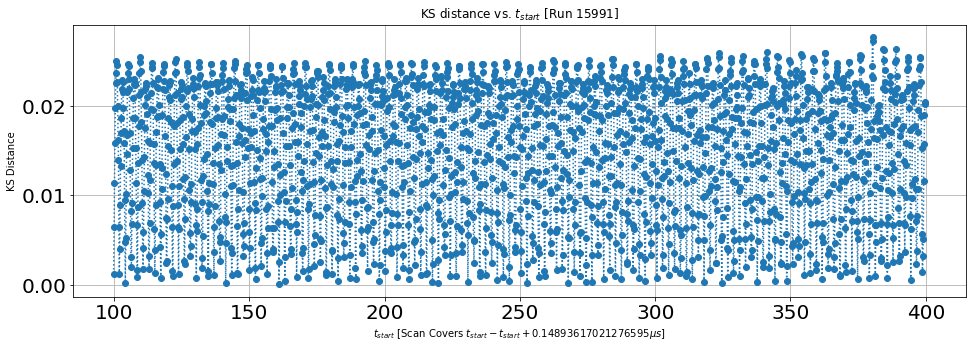

In [18]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(times,ks,':o')
plt.title(r"KS distance vs. $t_{start}$ [Run 15991]")
plt.xlabel(r"$t_{start}$ [Scan Covers $t_{start} - t_{start} + "+str(timeBinWidth)+r" \mu s$]")
plt.ylabel("KS Distance")
plt.grid()
plt.show()

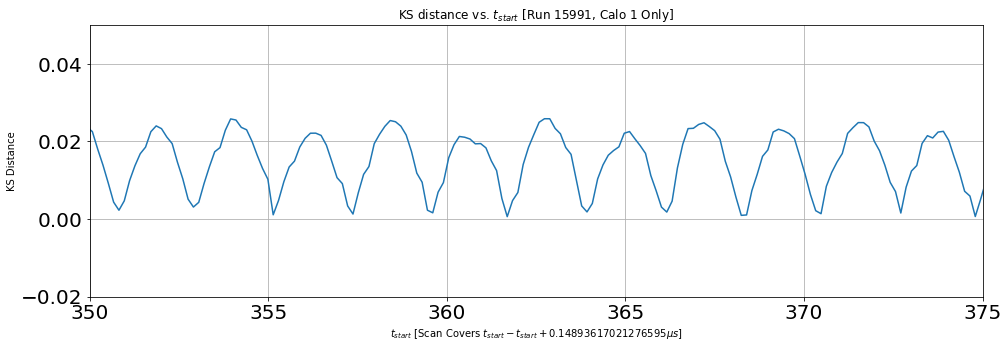

In [19]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(times,ks,'-')
plt.title(r"KS distance vs. $t_{start}$ [Run 15991, Calo 1 Only]")
plt.xlabel(r"$t_{start}$ [Scan Covers $t_{start} - t_{start} + "+str(timeBinWidth)+r" \mu s$]")
plt.ylabel("KS Distance")
plt.xlim(350,375)
plt.ylim(-0.02,0.05)
plt.grid()
plt.show()

In [20]:
hspec = evt_time.Clone()
hspec.SetTitle("KS Distance vs. Time; Time [#mus]; d_{KS}")
hspec.Reset()
#hspec = r.TH1D("hspec","hspec",4700,0,700)
for i, ksi in enumerate(zip(times,ks)):
    binnum = hspec.FindBin(ksi[0])
    hspec.SetBinContent(binnum,ksi[1])

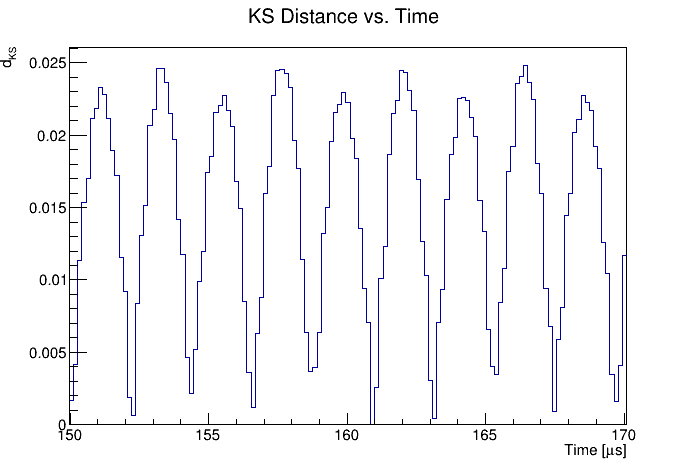

In [21]:
c = r.TCanvas()
hspec.Draw()
hspec.GetXaxis().SetRangeUser(150,170)
c.Draw()

In [22]:
hspec_orig = hspec.Clone() #keep this one unchanged so we can keep getting fit histograms from it

In [25]:
hspec2 = hspec.Clone()
hspec3 = hspec.Clone()
hspec4 = hspec.Clone()

In [22]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def peak_fit_sine(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return p[0]*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])) + p[3]

def peak_fit_sine_2(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return p[0]*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])) + p[3] +( p[4] + p[5]*(x[0]*x[0] - p[6]) )*r.TMath.Sin(omega*x[0] + p[2])

def peak_fit_sine_3(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return p[0]*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])) + p[3] +( p[4] )*r.TMath.Sin(omega*x[0] + p[2])

func1 = r.TF1("simplesine", peak_fit_sine, 100,400,4)
func1.SetParNames('A','R','#phi','+ C')
func1.SetParameters(0.03,0,0,0.002)
func1.SetParLimits(0,0.02,100)
func1.SetLineColor(2)
func1.SetNpx(1000)

func2 = r.TF1("complexsine", peak_fit_sine_2, 100,400,7)
func2.SetParNames('A_{1}','R','#phi_{1}','+ C', 'A_{2}', 'A_{2, t-quad}', 'A_{2,t - center}', 'A_{2,t-linear}')
func2.SetParameters(0.03,0,0,0.002,0.002,0.000001,100,0.000000000001)
func2.SetParLimits(0,0.02,100)
func2.SetLineColor(4)
func2.SetNpx(1000)

func3 = r.TF1("modsine", peak_fit_sine_3, 100,400,5)
func3.SetParNames('A_{1}','R','#phi_{1}','+ C', 'A_{2}', 'A_{2, t-quad}', 'A_{2,t - center}', 'A_{2,t-linear}')
func3.SetParameters(0.03,0,0,0.002,0.002,0.000001,100,0.000000000001)
func3.SetParLimits(0,0.02,100)
func3.SetLineColor(3)
func3.SetNpx(1000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


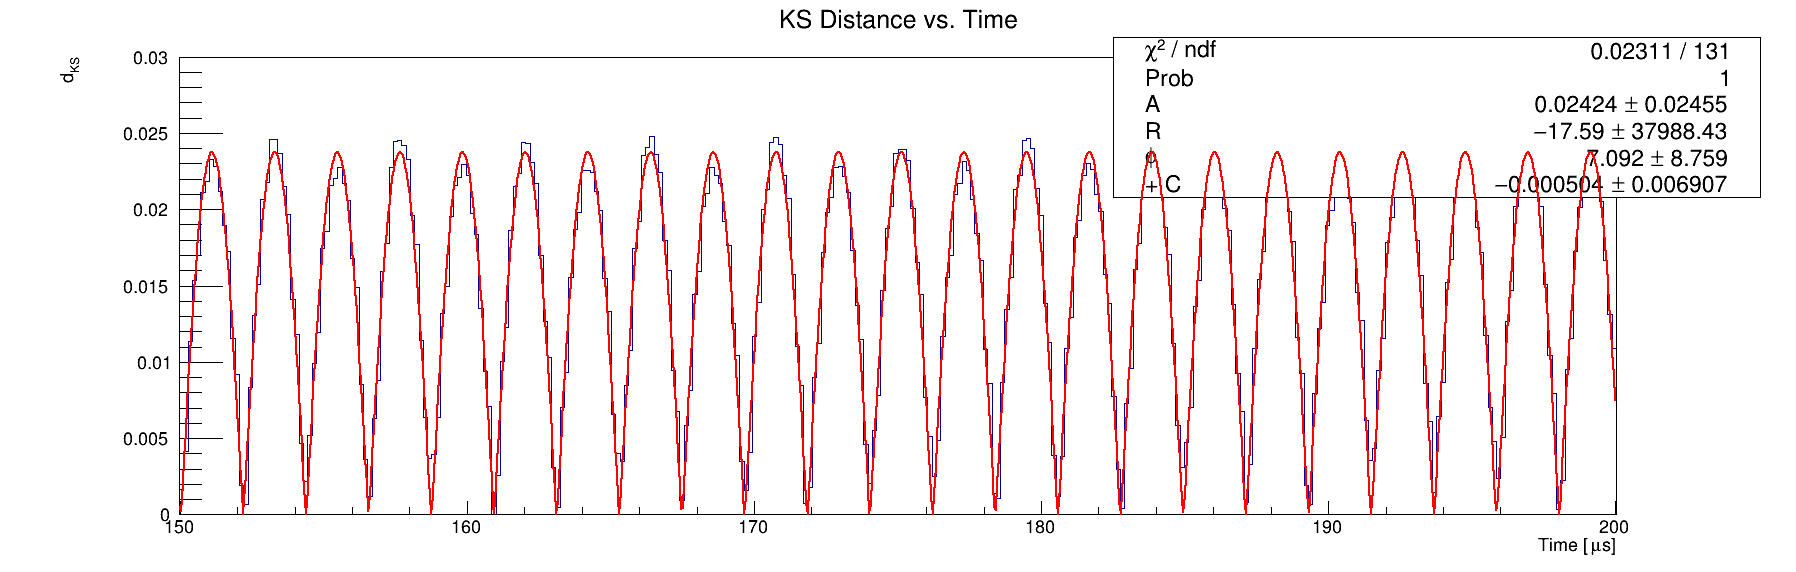

In [31]:
def peak_fit_sine_3(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return (( p[0] + p[4]*r.TMath.Sin(omega*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])) 
            + p[3] + p[11]*r.TMath.Sin(omega*x[0] + p[2])
            + (( p[5] + p[6]*r.TMath.Sin(omega*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])))**2
            + (( p[7] + p[8]*r.TMath.Sin(omega*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])))**3
            + (( p[9] + p[10]*r.TMath.Sin(omega*x[0]+ p[2]) )*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])))**4
            #+ (( p[11] + p[12]*r.TMath.Sin(omega*x[0] + p[2]) )*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2])))**5
            + p[12]*r.TMath.Sin(p[13]*omega*x[0] + p[14])
           ) 

func4 = r.TF1("sinsquare", peak_fit_sine_3, 0,5000,15)
func4.SetParNames('A_{1a}','#omega','#phi_{1}','A_{0a}', 'A_{1b}', 'A_{2a}', 
                  'A_{2b}', 'A_{3a}', 'A_{3b}', 'A_{4a}', 'A_{4b}')
func4.SetParName(11, 'A_{0b}')
func4.SetParName(12, 'A_{5b}')
func4.SetParName(12, 'A_{Resid-a}')
func4.SetParName(13, 'N_{#omega-a}')
func4.SetParName(14, 'N_{#phi-a}')
func4.SetParameters(0.03,1,1,1,1,1)
func4.SetParameter(13,6)
func4.SetParameter(14,0)
func4.SetParameter(12,0.00001)
#func4.SetParLimits(0,0.02,100)
func4.SetLineColor(6)
func4.SetNpx(1000)

 FCN=0.0595663 FROM MINOS     STATUS=SUCCESSFUL    299 CALLS        1638 TOTAL
                     EDM=3.85187e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            2.42540e-02   1.34594e-02   4.63631e-04   2.05490e-01
   2  R           -4.16874e+02   8.51923e+03  -1.13751e+01   2.45584e-06
   3  #phi         7.18257e+00   2.10608e+00  -2.40299e-03  -3.64620e-02
   4  + C         -5.01184e-04   5.11055e-03   5.11055e-03  -1.57520e-01


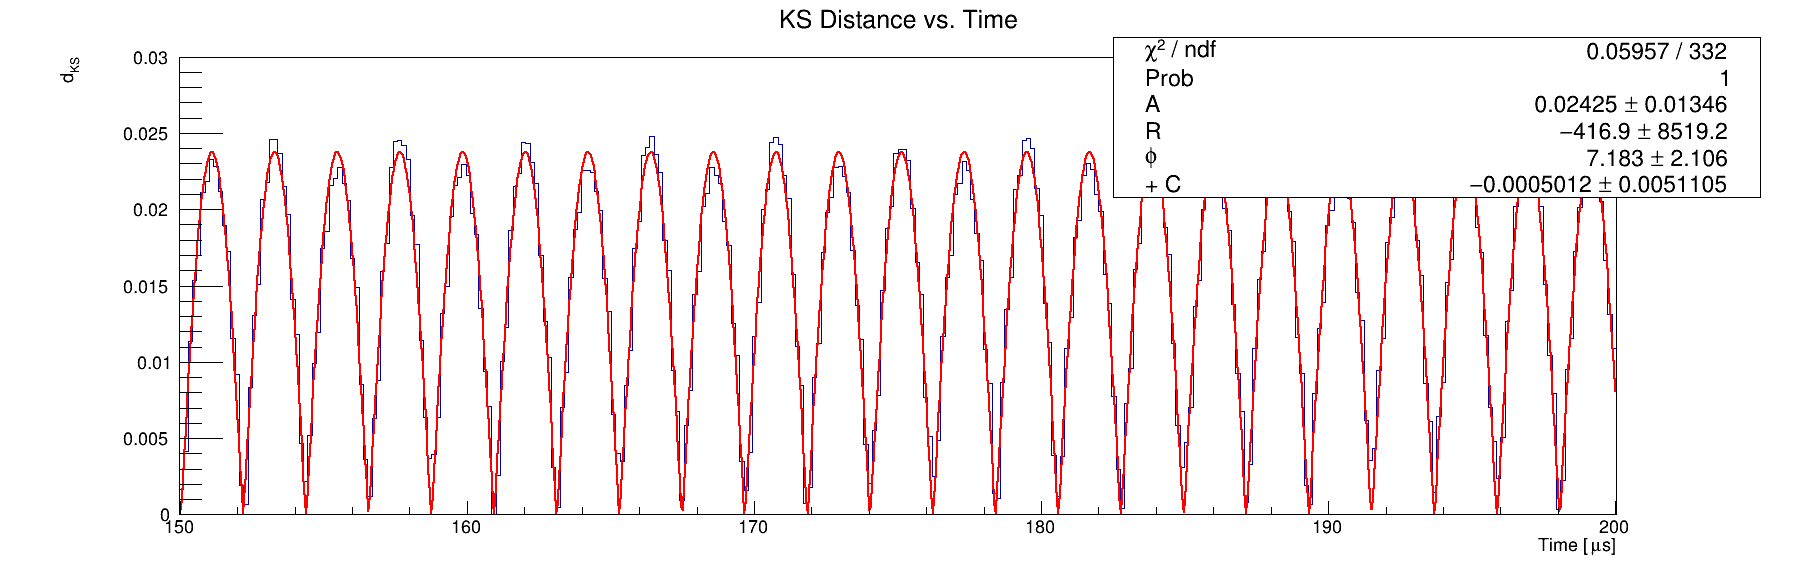

In [32]:
c = r.TCanvas("c","c",1800,600)
hspec.Draw()

hspec2.GetXaxis().SetRangeUser(50,550)
hspec.Fit("simplesine","REMB")
hspec2.GetXaxis().SetRangeUser(50,70)

c.Draw()

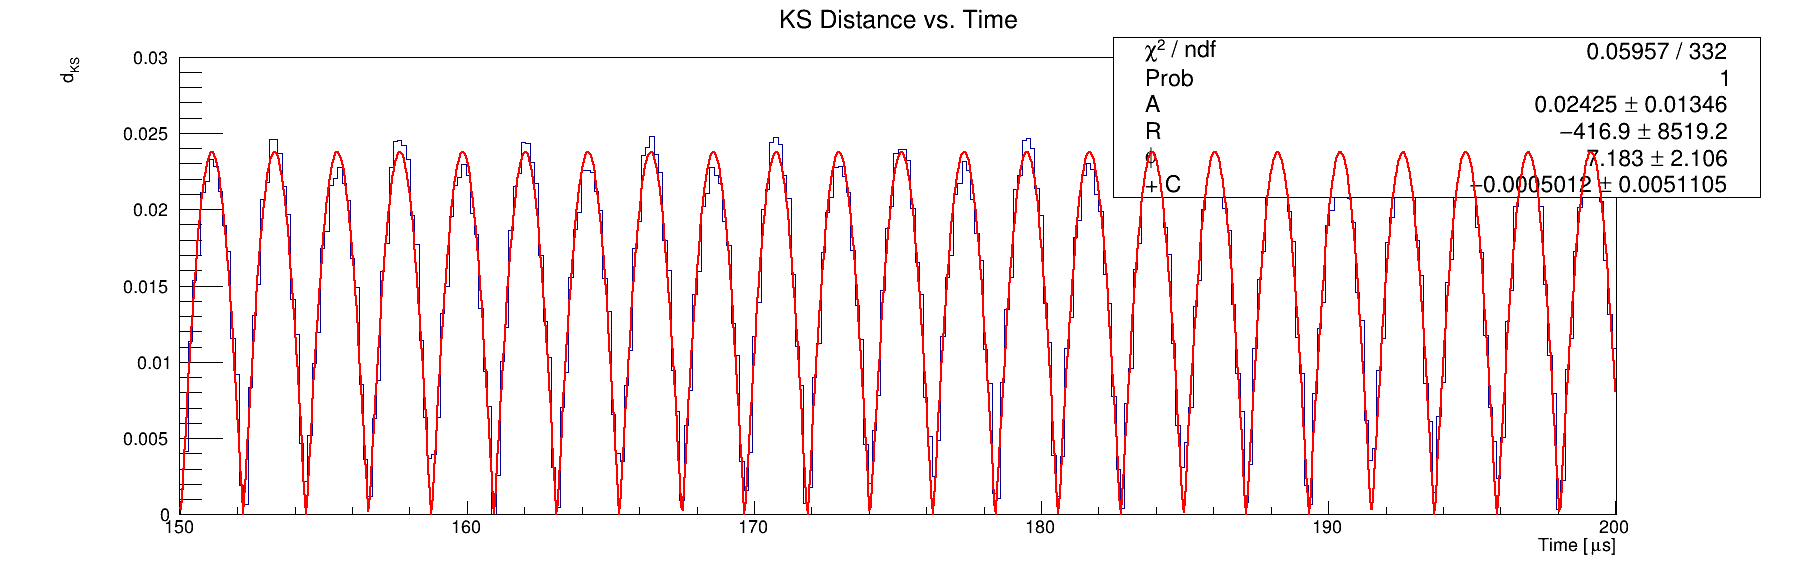

In [33]:
c = r.TCanvas("c","c",1800,600)
hspec.Draw()
hspec.GetYaxis().SetRangeUser(0,0.03)
hspec.GetXaxis().SetRangeUser(150,200)
for i in range(4):
    func4.SetParameter(i, func4.GetParameter(i))  
#func4.SetParameter(4,0.001)
#func4.SetParameter(5,0)
func1.Draw("SAME")
func4.Draw("SAME")
c.Draw()

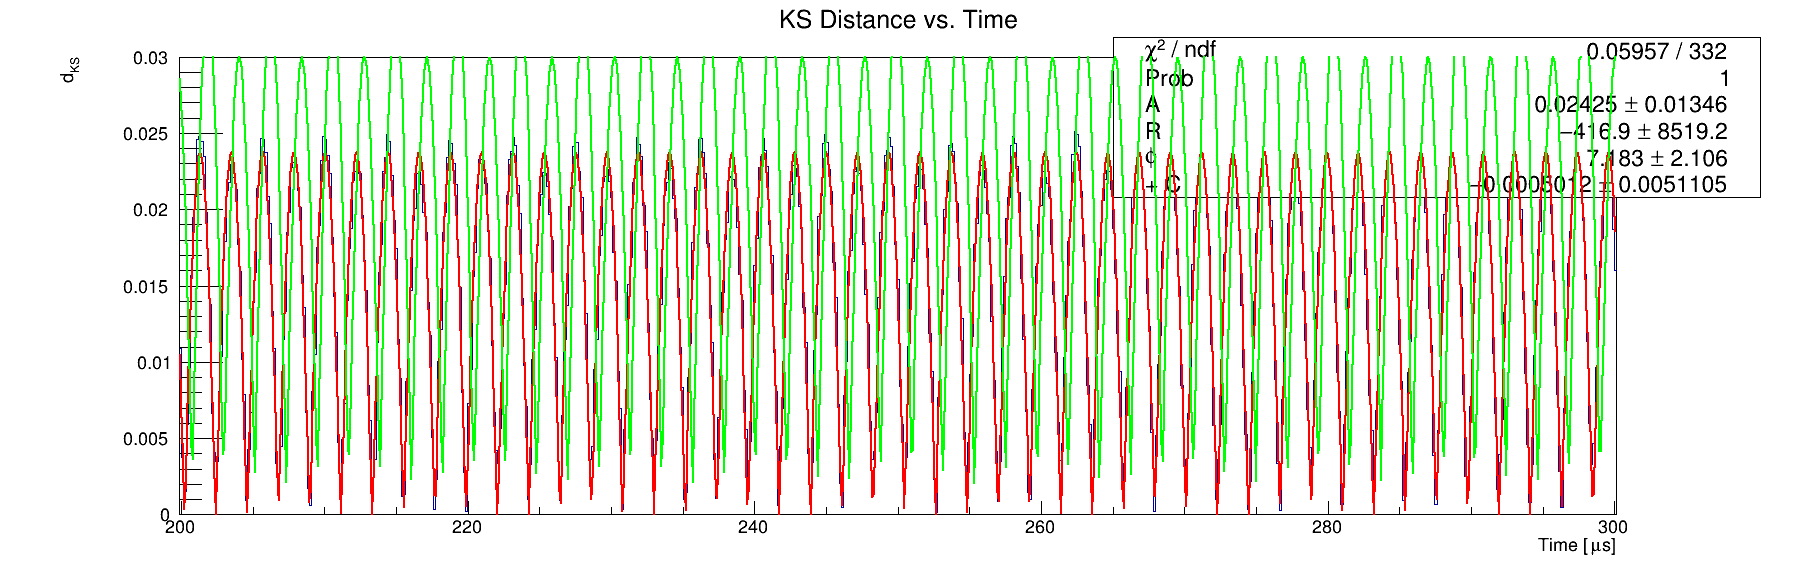

In [34]:
c = r.TCanvas("c","c",1800,600)
hspec.Draw()
hspec.GetXaxis().SetRangeUser(200,300)
func1.Draw("SAME")
func3.Draw("SAME")
c.Draw()

func2.FixParameter(2, func1.GetParameter(2))

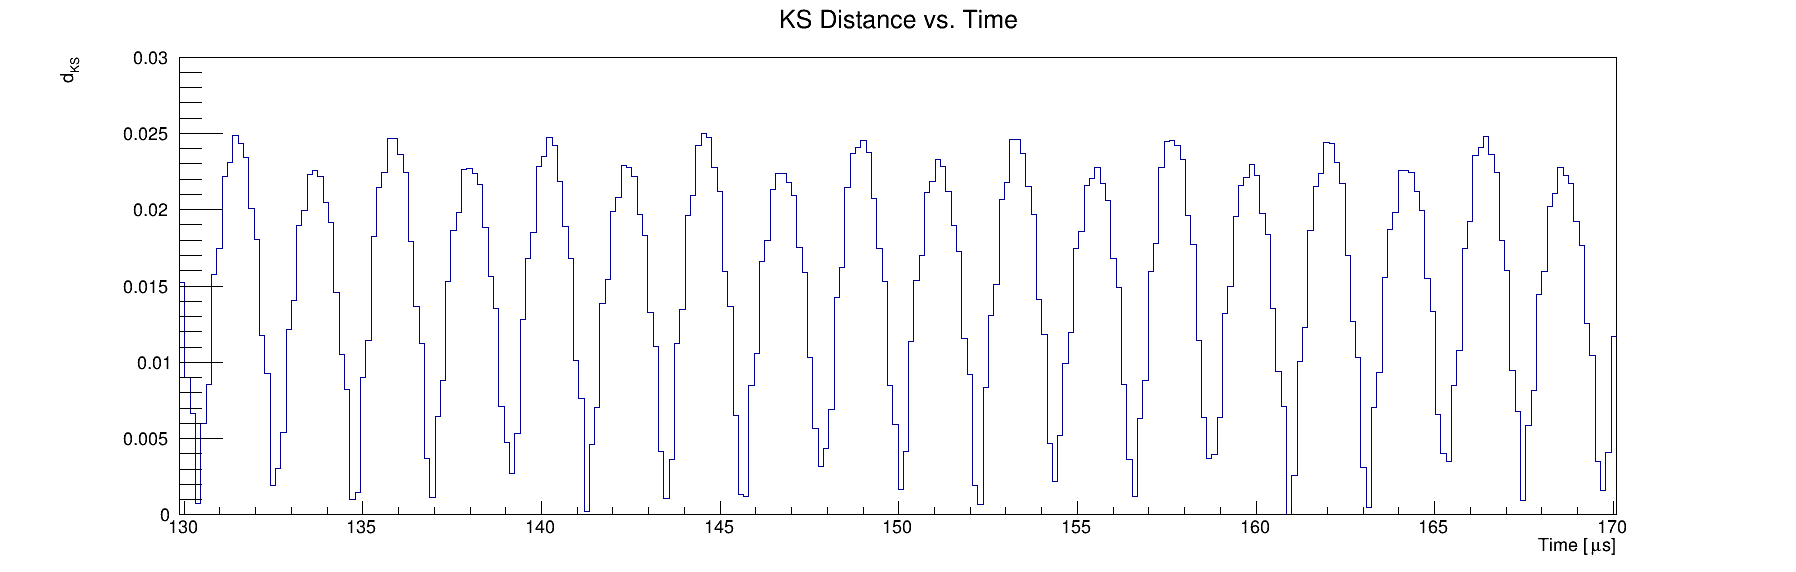

In [35]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(130,170)
c.Draw()

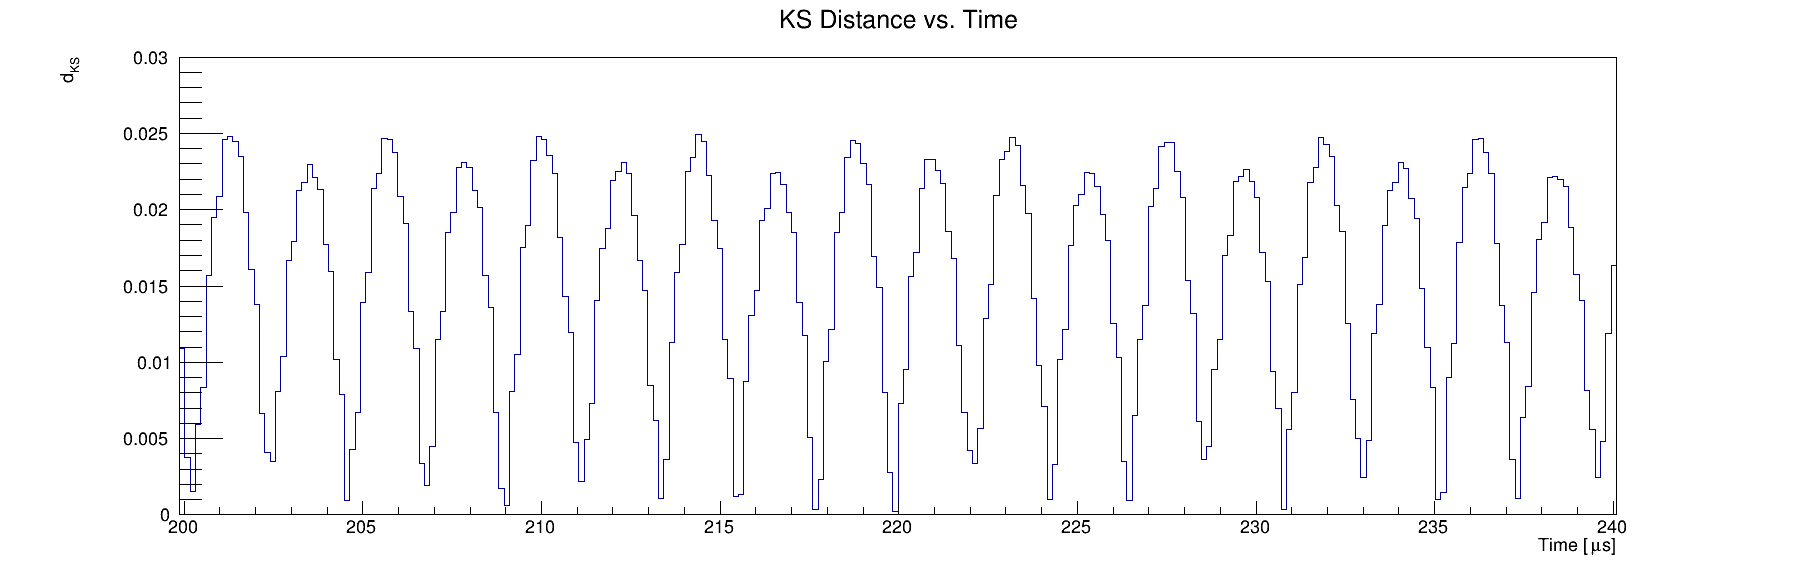

In [36]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(200,240)
c.Draw()

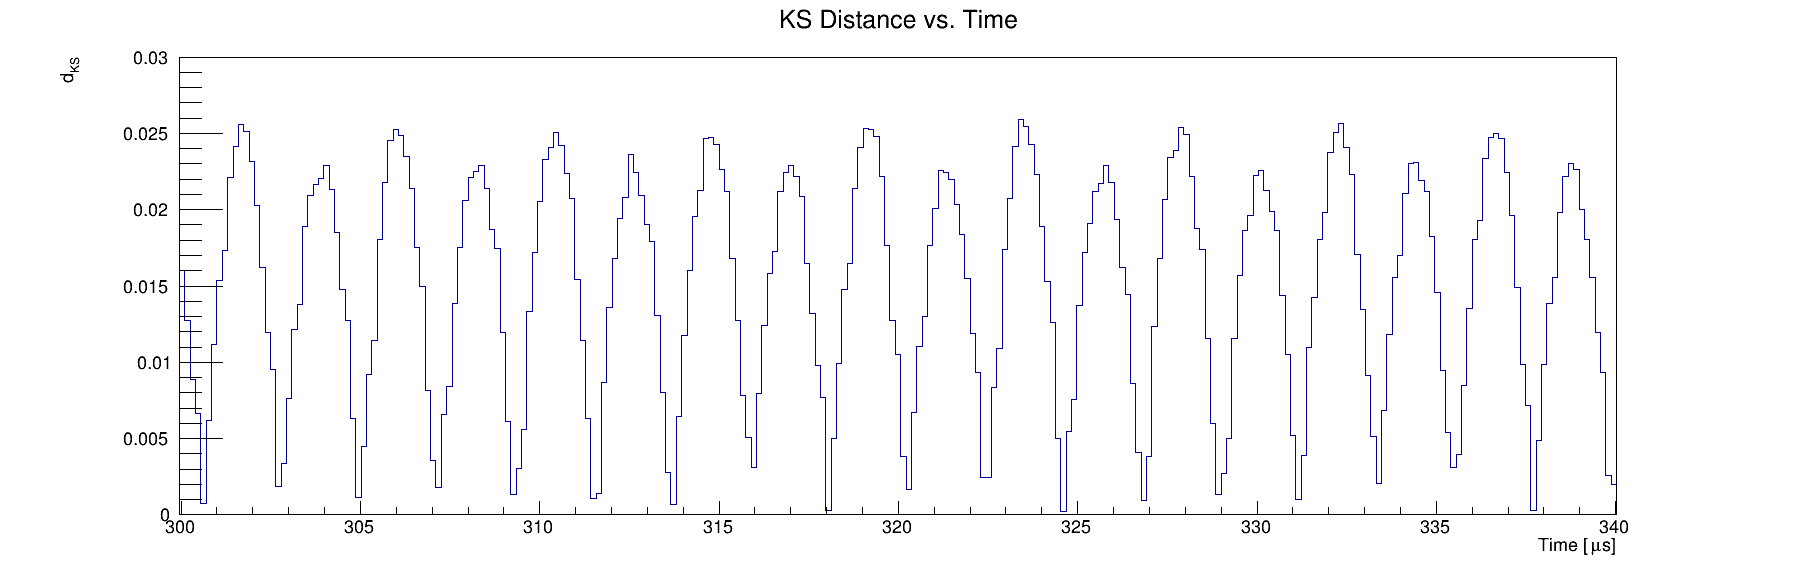

In [37]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(300,340)
c.Draw()

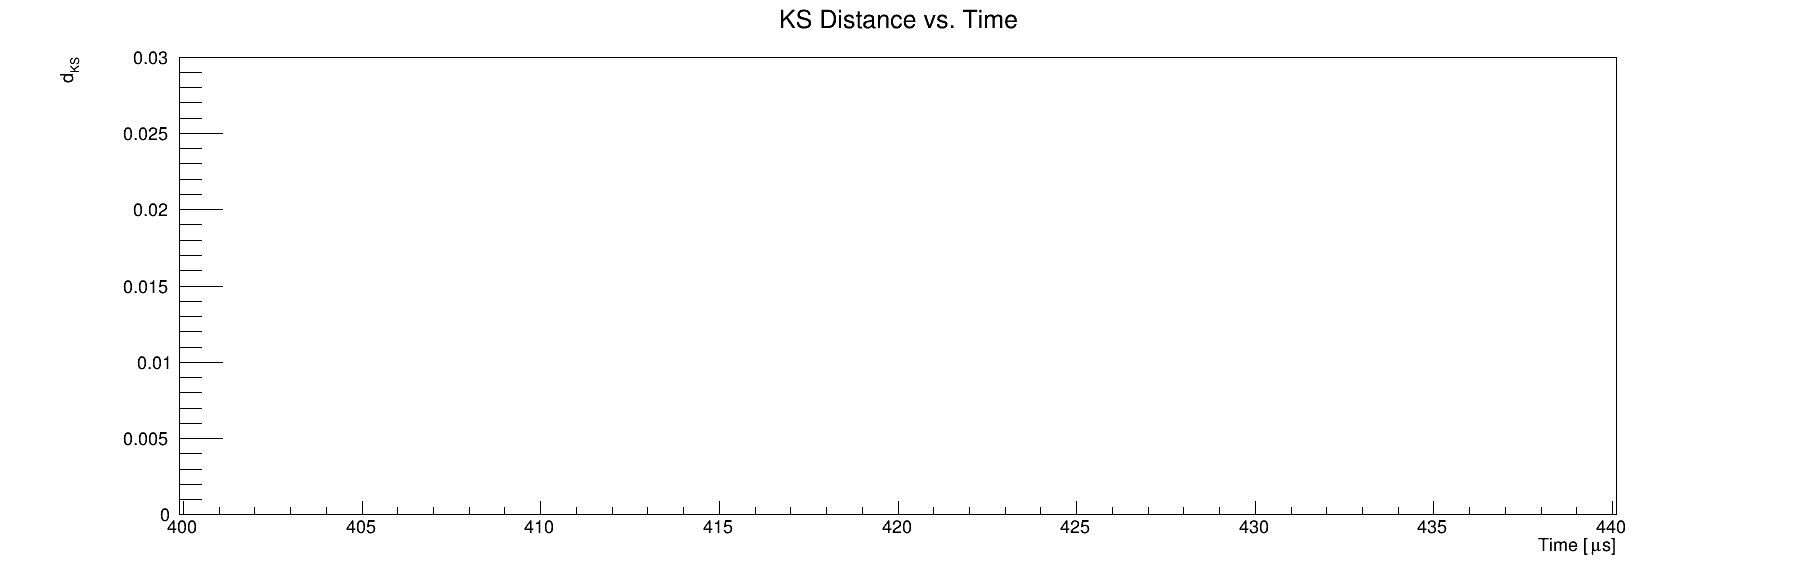

In [38]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(400,440)
c.Draw()

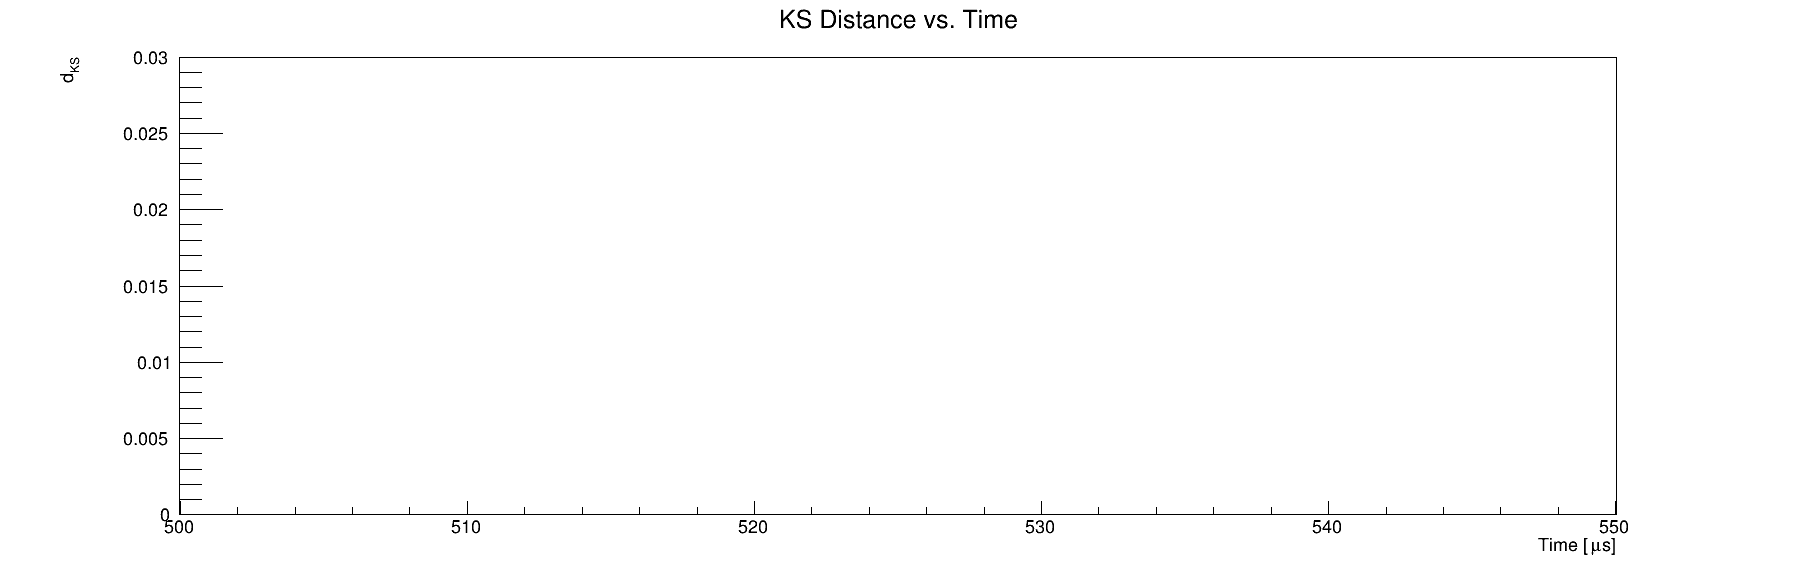

In [39]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(500,550)
c.Draw()

Starting fit: 1
Starting fit: 2
 FCN=0.594182 FROM MIGRAD    STATUS=CALL LIMIT   3637 CALLS        3638 TOTAL
                     EDM=0.00709141    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.1 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{1a}       3.70379e-03   2.14159e-02  -7.41544e-04   5.75427e+00
   2  #omega      -3.25058e+02   1.36198e+02  -1.15381e-02  -6.13818e-04
   3  #phi_{1}     9.26125e-01   4.17348e-02  -1.22877e-04   5.20685e-01
   4  A_{0a}       9.03526e-04   2.16774e-03   3.08678e-05   3.20453e+01
   5  A_{1b}       4.12705e-02   4.03592e-02   9.81321e-04   1.83277e+00
   6  A_{2a}       2.28622e-01   1.45337e-01   2.78804e-03   8.31710e+00
   7  A_{2b}      -1.48335e-01   3.39660e-02   2.79973e-04  -5.71904e+00
   8  A_{3a}      -3.60255e-01   1.27482e-01  -2.39631e-03   8.86562e+00
   9  A_{3b}       8.81336e-02   4.62373e-02  -6.43916e-04  -2.92048e+

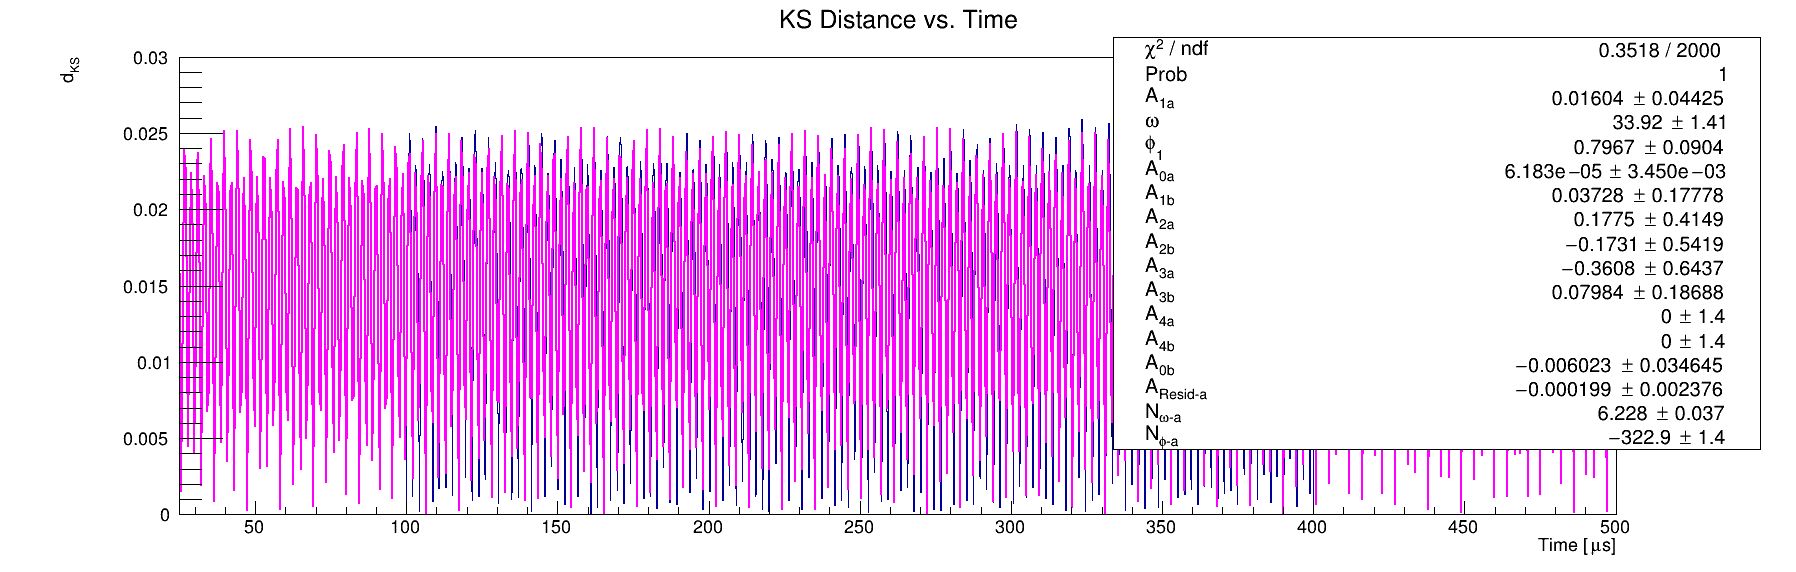

In [41]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetXaxis().SetRangeUser(25,500)
for i in range(2):
    print("Starting fit:", i+1)
    hspec2.Fit("sinsquare","REMB")
c.Draw()

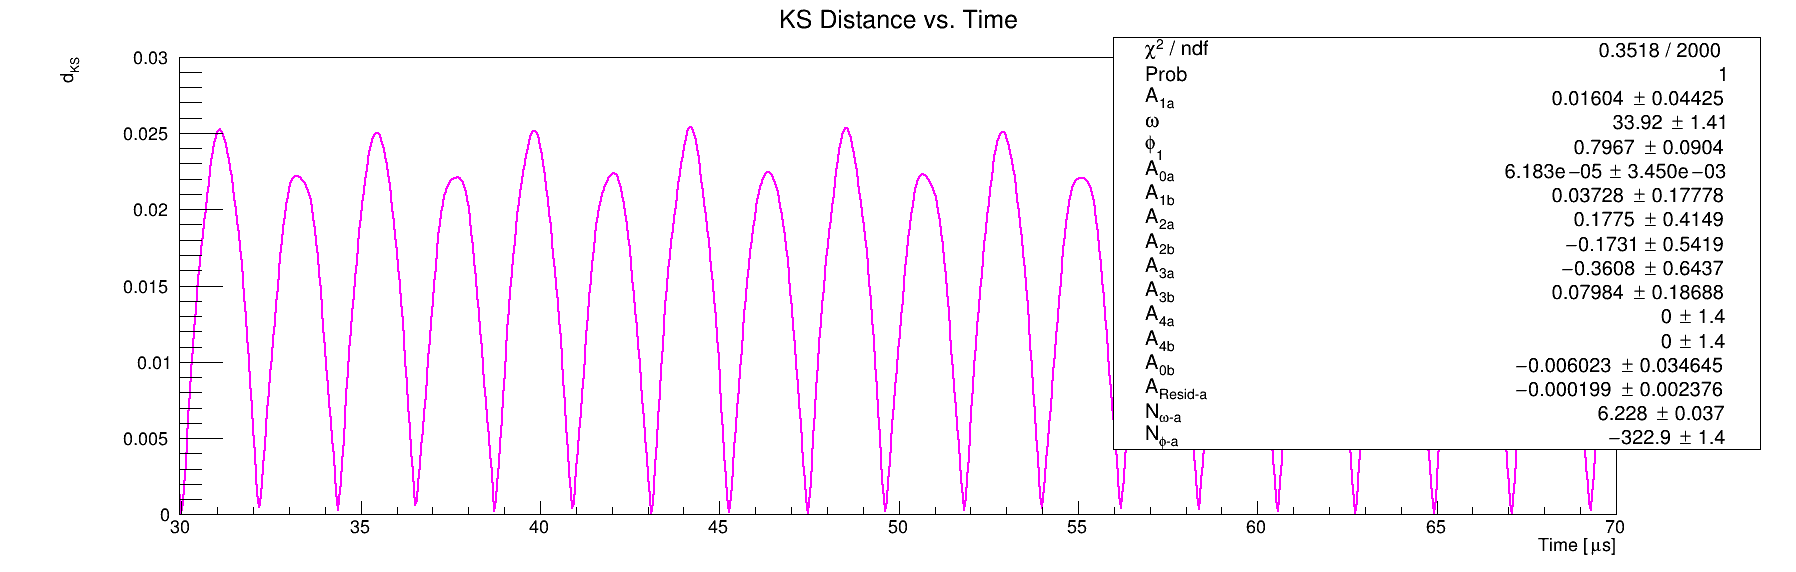

In [42]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(30,70)
c.Draw()

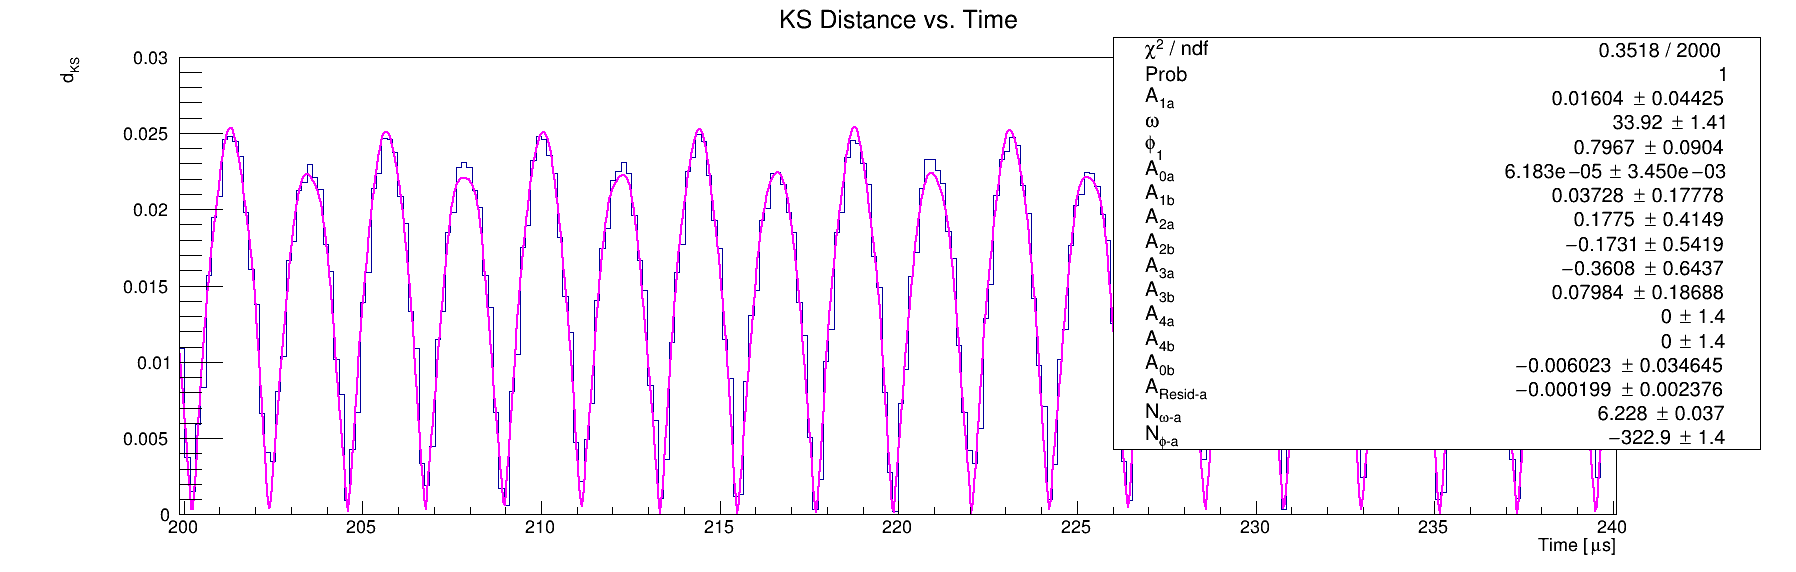

In [43]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(200,240)
c.Draw()

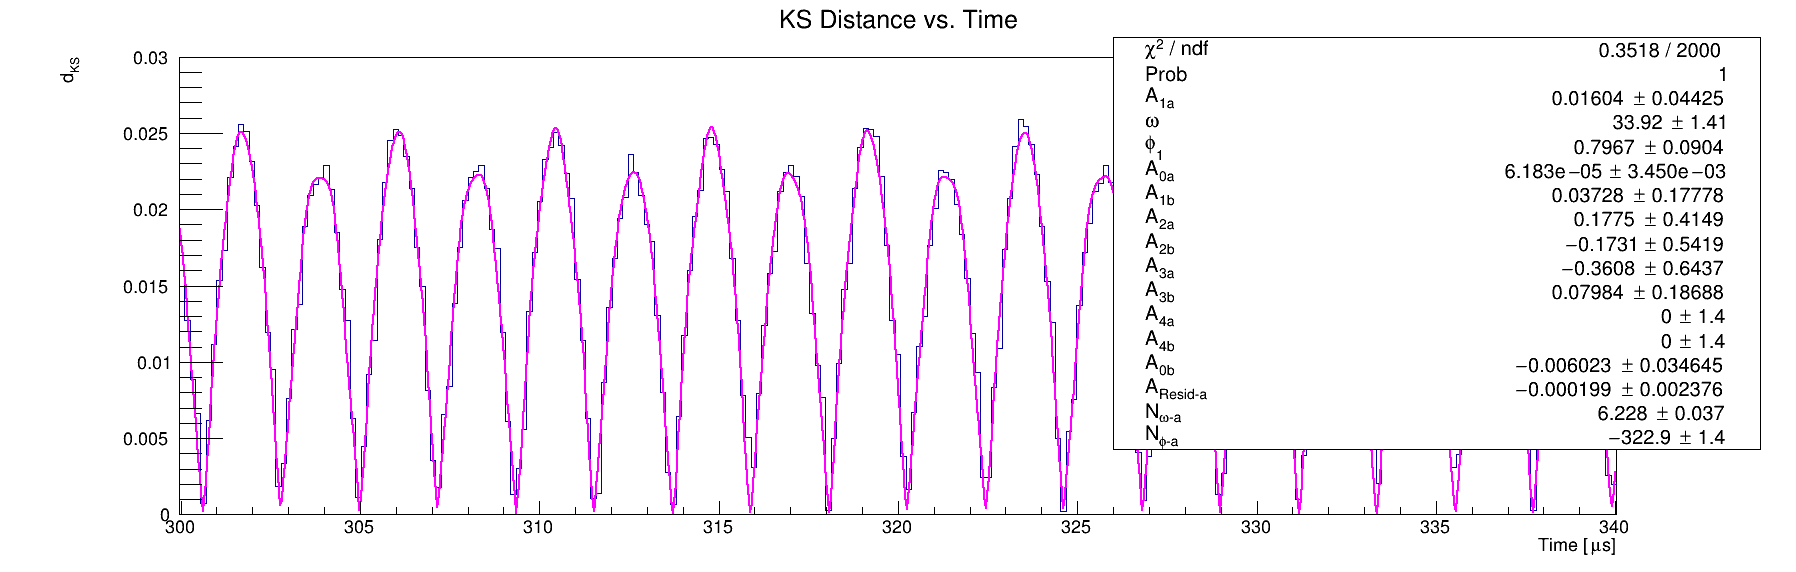

In [44]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(300,340)
c.Draw()

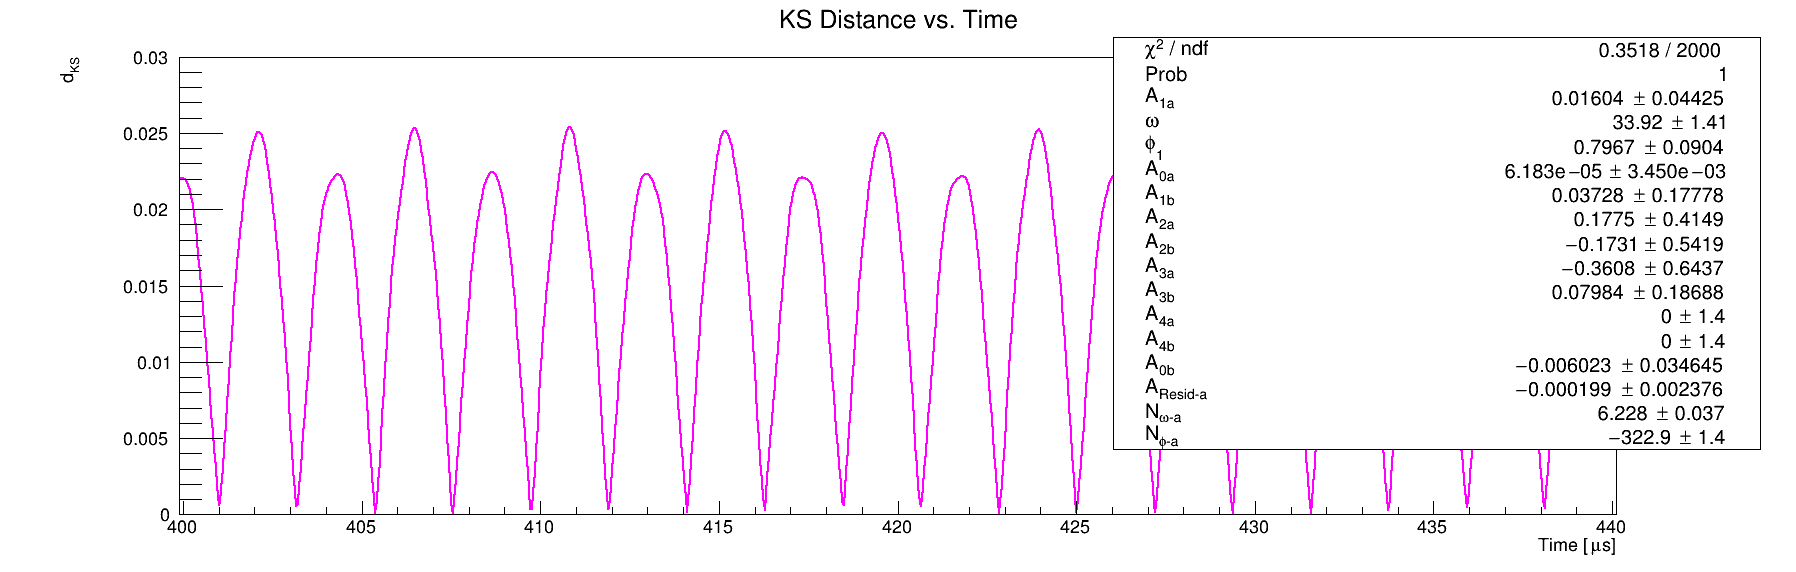

In [45]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(400,440)
c.Draw()

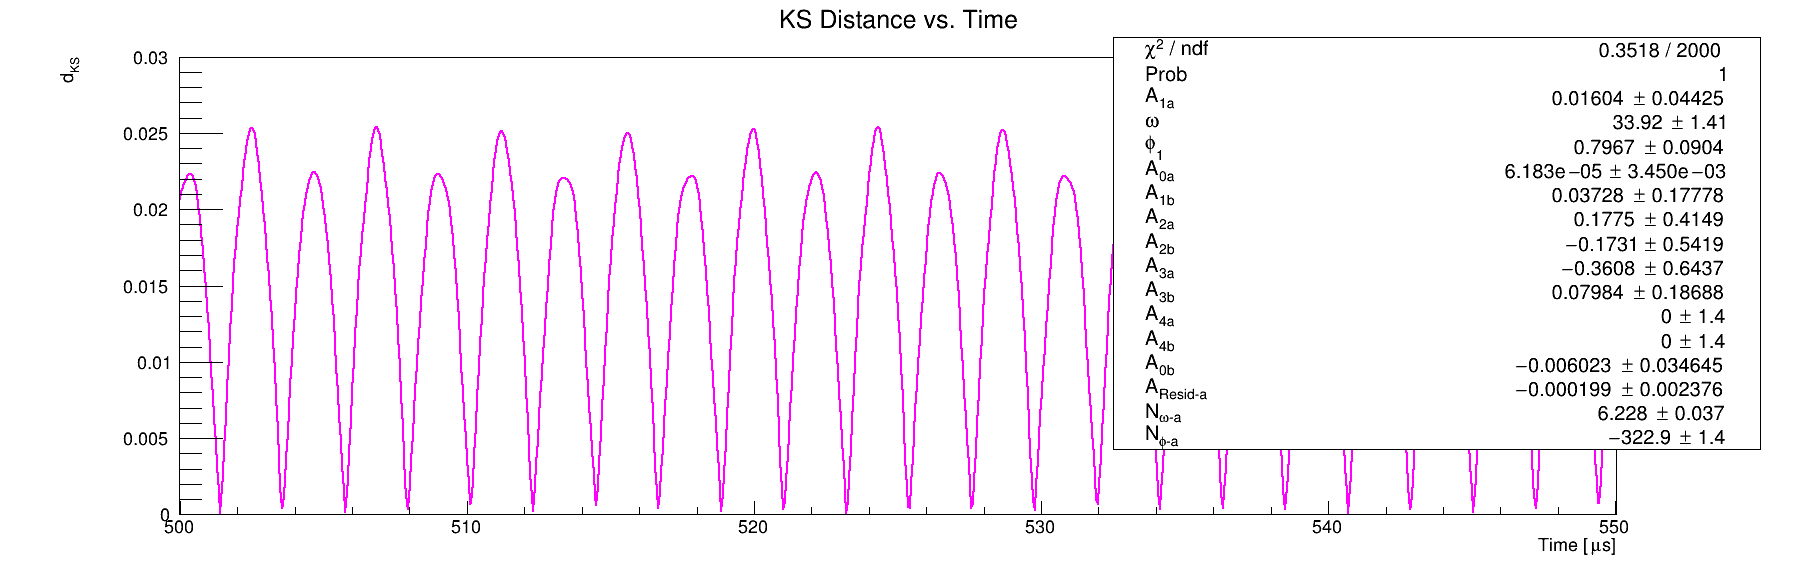

In [46]:
c = r.TCanvas("c","c",1800,600)
hspec2.Draw()
hspec2.GetYaxis().SetRangeUser(0,0.03)
hspec2.GetXaxis().SetRangeUser(500,550)
c.Draw()

Creating new Ratio Plot


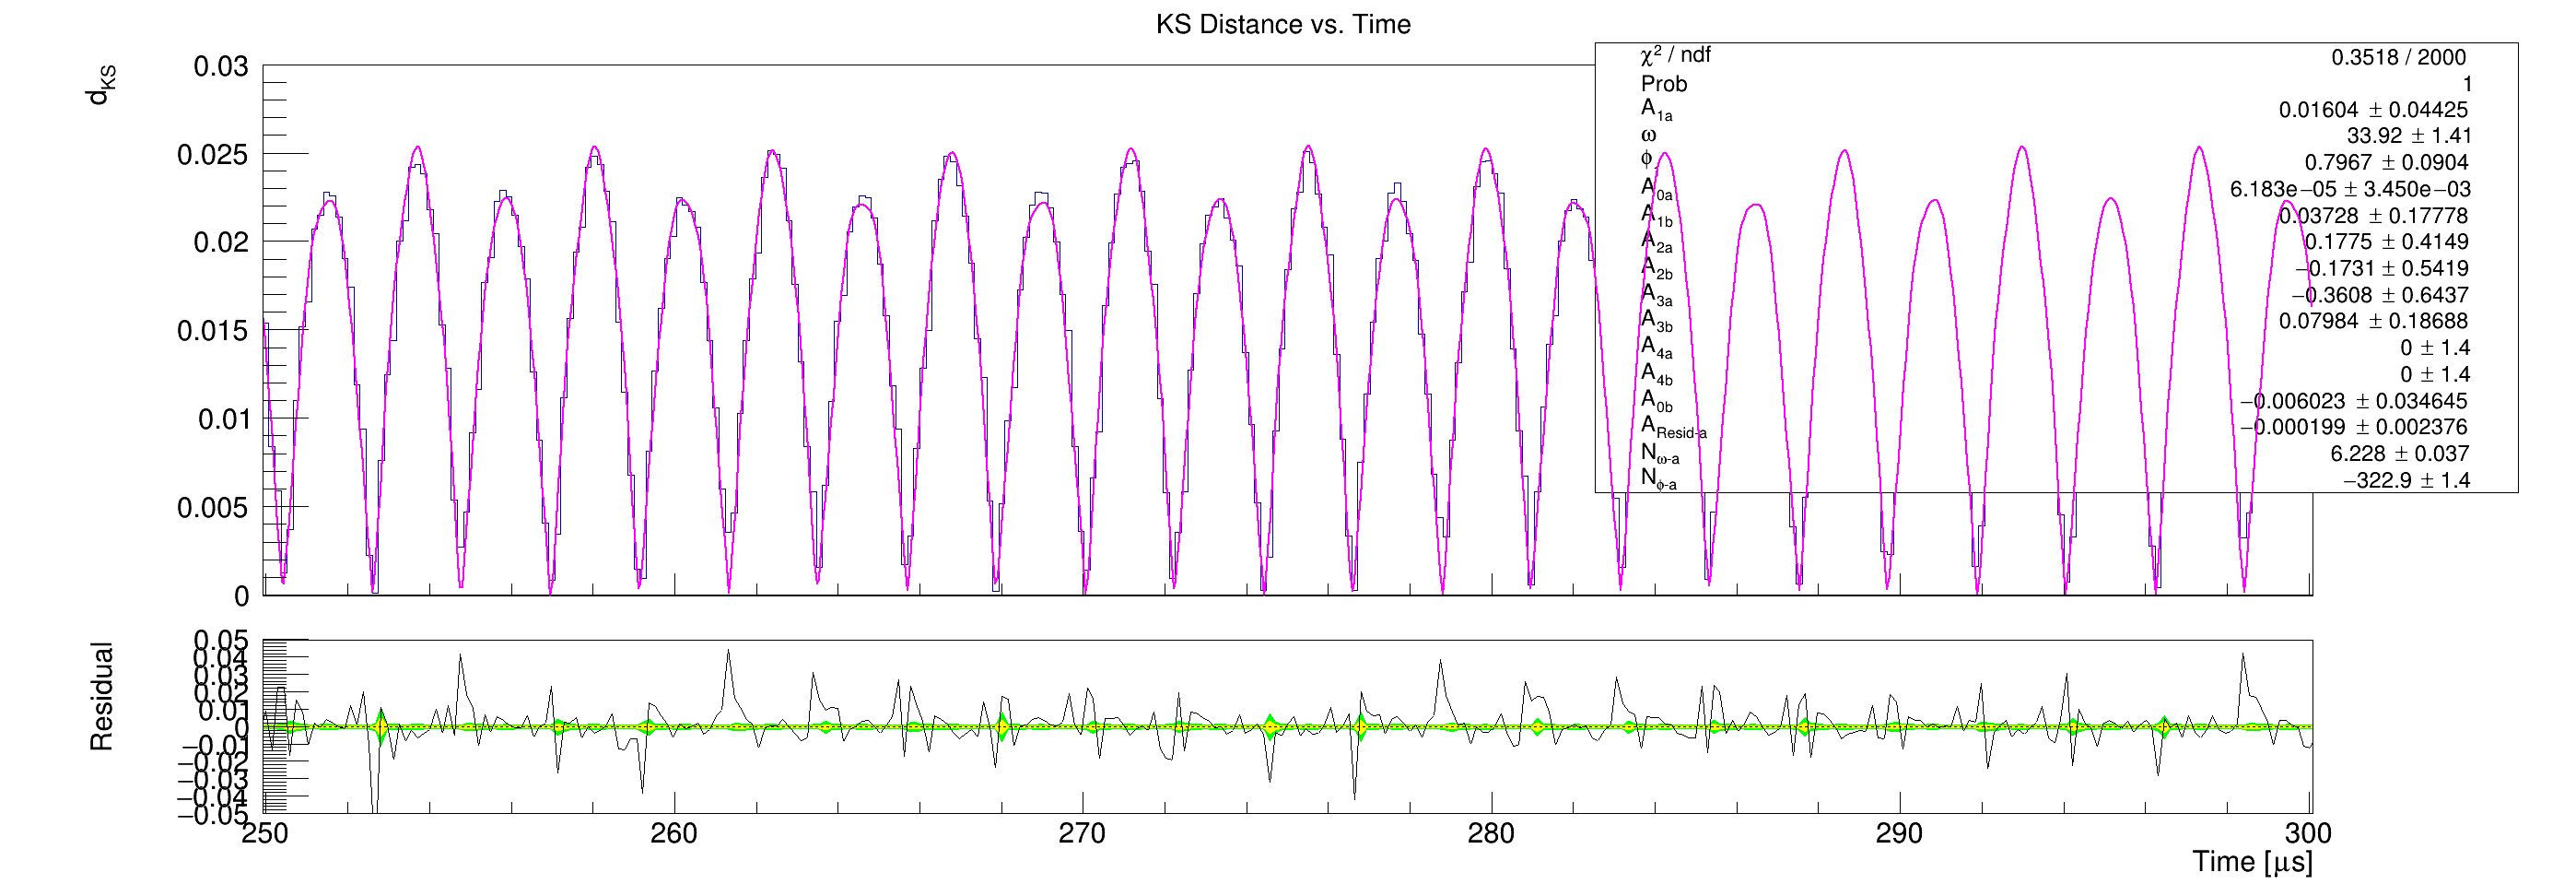

In [47]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas("c","c",2800,1000)
hspec2.Draw()
hspec2.GetXaxis().SetRangeUser(250,300)

c3.Draw()

try:
    rp1.Delete()
except:
    print("Creating new Ratio Plot")

rp1 = r.TRatioPlot(hspec2)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-0.05,0.05)


c3.Update()
c3.Draw()

---

In [48]:
hspec_resid2 = hspec2.Clone()
hspec_resid2.Reset()
hspec_resid2.SetTitle("Residuals of KS vs. Time Fit")

residVec = []
nBins = hspec2.GetSize() - 2
for i in range(nBins):
    binCenterX = hspec2.GetXaxis().GetBinCenter(i)
    if (binCenterX > t1global and binCenterX < t2global):
        residVec.append( (binCenterX, hspec2.GetBinContent(i) - func3.Eval(binCenterX) ) )
        hspec_resid2.SetBinContent(i, hspec2.GetBinContent(i) - func3.Eval(binCenterX))
    else:
        hspec_resid2.SetBinContent(i, 0)

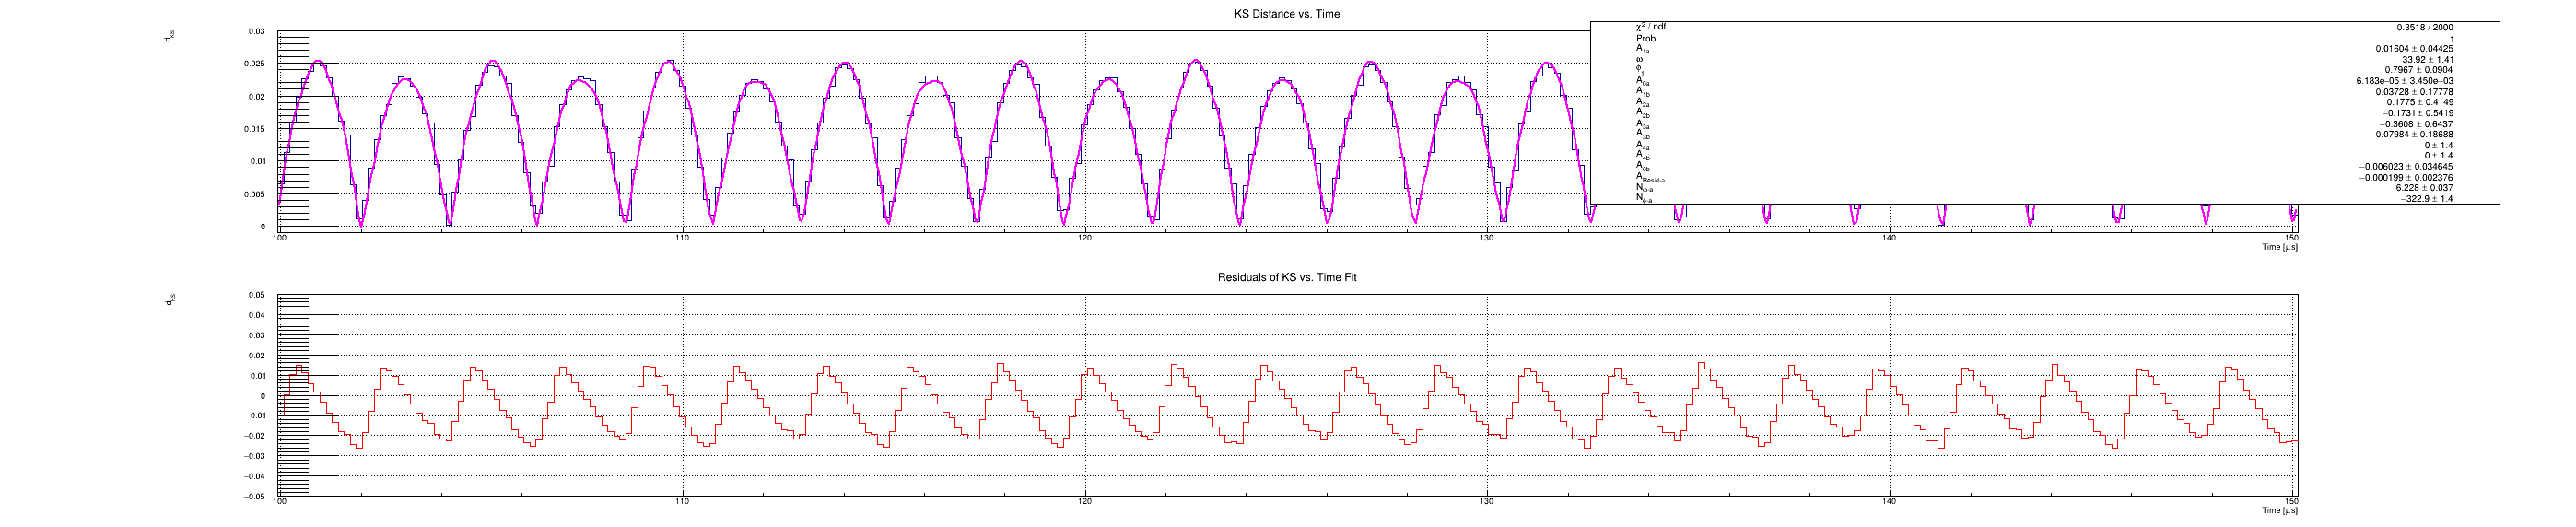

In [52]:
c = r.TCanvas("c","c",2800,600)
x1 = 100
x2 = x1+50
c.Divide(1,2)
c.cd(1)
hspec2.Draw()
hspec2.GetXaxis().SetRangeUser(x1,x2)
hspec2.GetYaxis().SetRangeUser(-0.001,0.03)
r.gPad.SetGrid()
c.cd(2)
hspec_resid2.SetLineColor(2)
hspec_resid2.Draw()
hspec_resid2.GetXaxis().SetRangeUser(x1,x2)
hspec_resid2.GetYaxis().SetRangeUser(-0.05,0.05)
r.gPad.SetGrid()
c.Draw()

---

### Now lets add in a quartic term to the magnitude of the sine

---

### Lets now fourier transform this fit function

In [42]:
ffthists = [hspec2.Clone(), hspec_resid2.Clone()]

4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715
4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715


Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


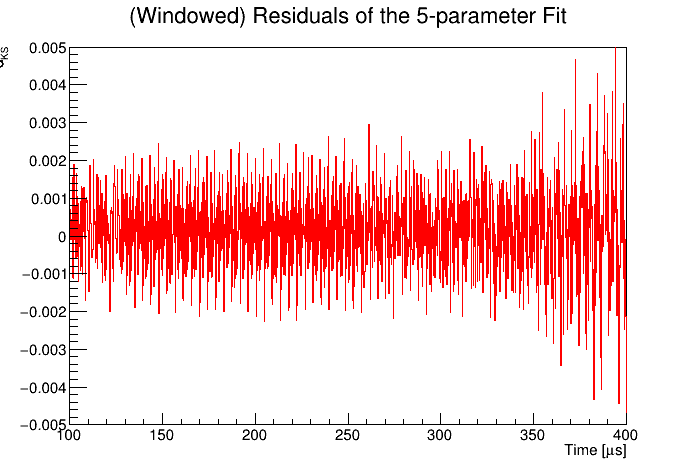

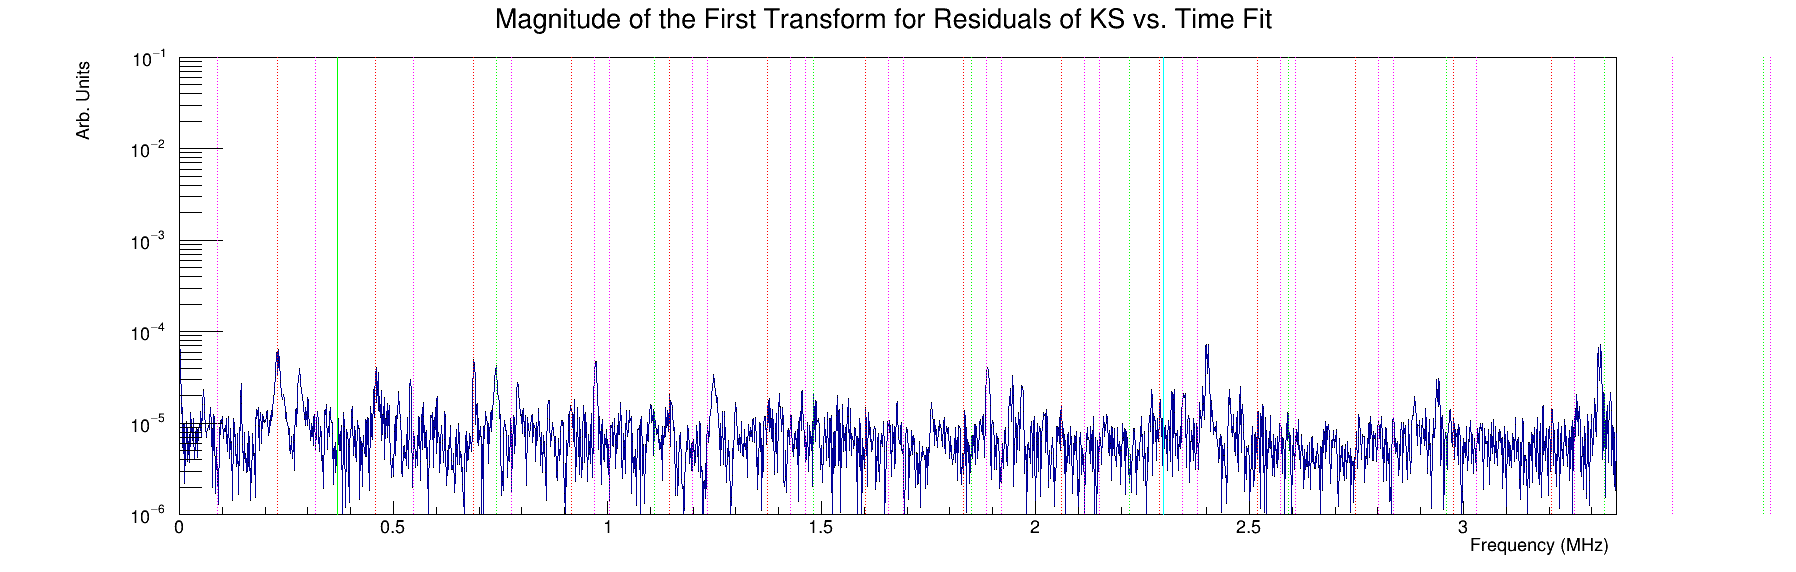

In [43]:
ffts = []

for htest in ffthists:
    c3 = r.TCanvas()
    residuals5param = htest.Clone()
    nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

    #apply a windows function to try to get rid of the imaginary peaks
    welchVec = []
    for i in range(nBins):
        unwindowed = residuals5param.GetBinContent(i)
        welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
        welchVec.append(welch)
        residuals5param.SetBinContent(i, unwindowed *  welch)

    residuals5param.Draw()
    residuals5param.GetXaxis().SetRangeUser(t1global,t2global)
    residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
    c3.Draw() 
    
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    hxform = residuals5param.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform for "+(htest.GetTitle()))
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    c2 = r.TCanvas("c2","c2",1800,600)
    c2.cd()
    #c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("HIST P0 L")
    c2.Draw()

    Npart = residuals5param.GetSize() - 2
    minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
    maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10.0,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)
    #hxform.GetXaxis().SetLimits(0,limmax)
    nbins = residuals5param.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    #hxform.GetXaxis().SetRangeUser(0,1.4)

    residuals5paramXform = hxform.Clone()

    hxform.GetYaxis().SetRangeUser(0.000001,0.1)
    cboline = r.TLine(0.37,0.000001,0.37,0.1)
    cboline.SetLineColor(3)
    cboline.Draw("SAME")

    vwline = r.TLine(2.3,0.000001,2.3,0.1)
    vwline.SetLineColor(7)
    vwline.Draw("SAME")
    
    oalines = []
    for i in range(1,15):
        oalinei = r.TLine(0.229*i,0.000001,0.229*i,0.1)
        oalinei.SetLineColor(2)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oalines.append(oalinei)
        
    oa_cbo_lines = []
    oa_cbo_lines_pos = []
    oa_cbo_lines_neg = []
    for i in range(1,15):
        oalinei = r.TLine(0.37*i,0.000001,0.37*i,0.1)
        oalinei.SetLineColor(3)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oa_cbo_lines.append(oalinei)
    for i in range(1,15):
        oalinei = r.TLine(0.229*i+0.37*2,0.000001,0.229*i+0.37*2,0.1)
        oalinei.SetLineColor(6)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oa_cbo_lines_pos.append(oalinei)
    for i in range(2,15):
        oalinei = r.TLine(0.229*i-0.37,0.000001,0.229*i-0.37,0.1)
        oalinei.SetLineColor(6)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oa_cbo_lines_neg.append(oalinei)

    c2.SetLogy()
    c2.Draw()
    
    ffts.append(hxform.Clone())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


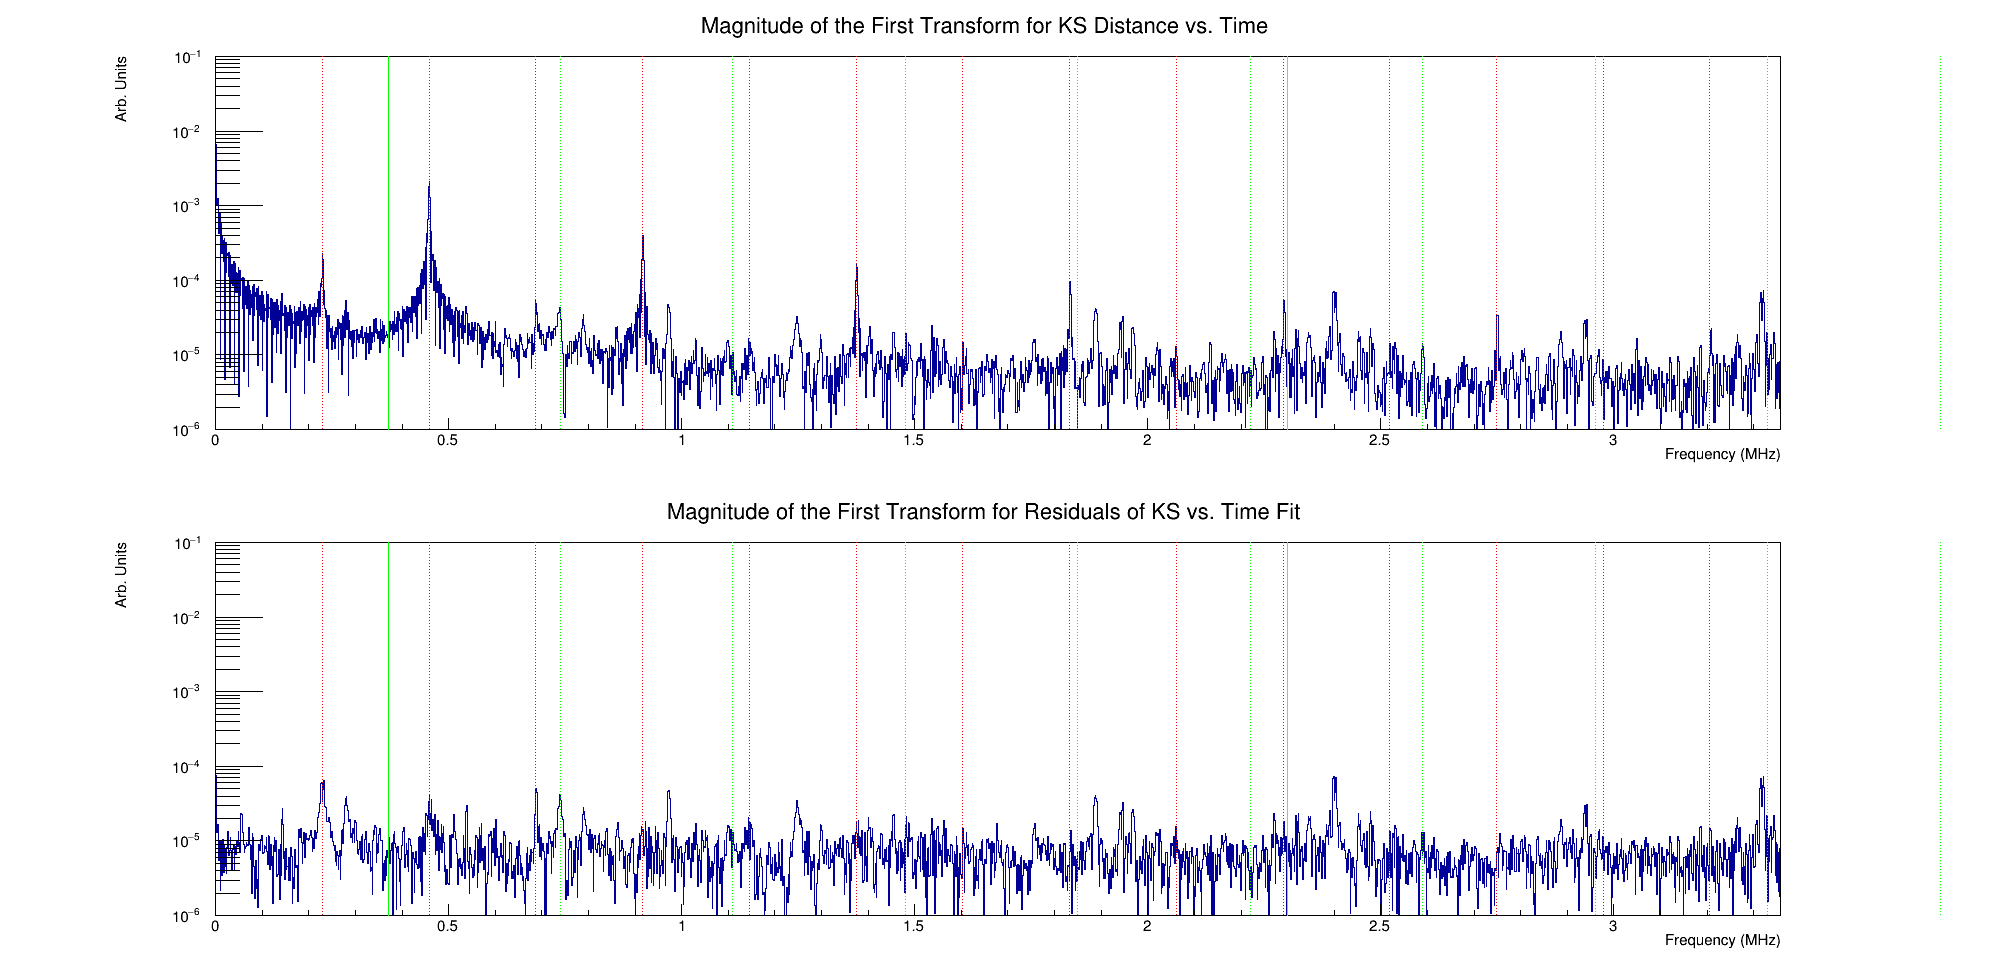

In [44]:
c = r.TCanvas("c","c",2000,1000)
c.Divide(1,2)
for i, h in enumerate(ffts):
    c.cd(i+1)
    r.gPad.SetLogy()
    h.Draw("hist")
    
    cboline.Draw("SAME")
    vwline.Draw("SAME")
    for oalinei in oalines:
        oalinei.Draw("SAME")
    for oalinei in oa_cbo_lines:
        oalinei.Draw("SAME")
    #for oalinei in oa_cbo_lines_neg:
    #    oalinei.Draw("SAME")
    
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


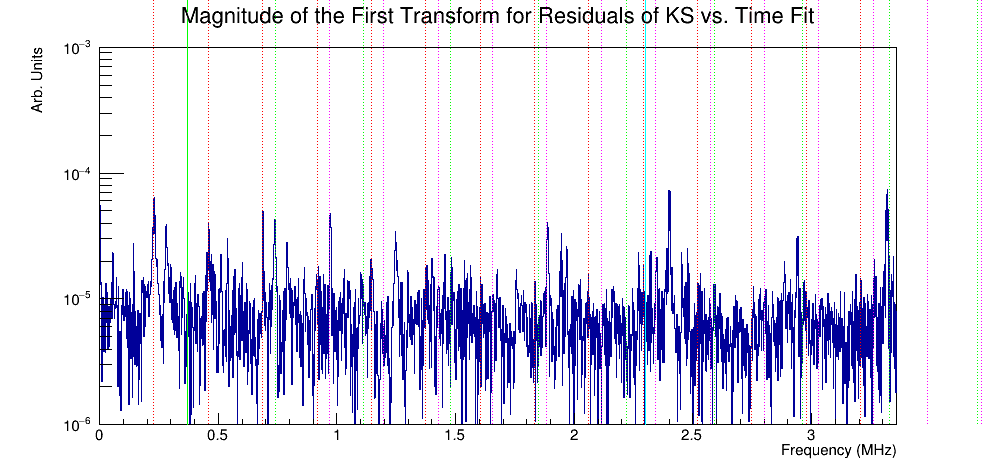

In [45]:
c = r.TCanvas("c","c",1000,500)
for i, h in enumerate(ffts):
    r.gPad.SetLogy()
    h.Draw("hist")
    h.GetYaxis().SetRangeUser(0.000001,0.001)
    
    cboline.Draw("SAME")
    vwline.Draw("SAME")
    for oalinei in oalines:
        oalinei.Draw("SAME")
    for oalinei in oa_cbo_lines:
        oalinei.Draw("SAME")
    for oalinei in oa_cbo_lines_pos:
        oalinei.Draw("SAME")
    
c.Draw()

---

### Looks like theres a lot of CBO in there still, let's see if we can take that out

In [46]:
def peak_fit_sine_4(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return ( p[0]*r.TMath.Abs(r.TMath.Sin(omega*x[0] + p[2]))    #Abs value of normal omega_a term
            + p[3]                                               #const offset from 0
            + ( p[4] )*r.TMath.Sin(omega*x[0] + p[2])            #omega_a modulated sine
            + p[8]*r.TMath.Abs(r.TMath.Sin(p[6]*x[0] + p[7]))    #Abs value of normal cbo term
            + ( p[5] )*r.TMath.Sin(p[6]*x[0] + p[7])             #omega_cbo modulated sine
            )
            
func4 = r.TF1("modsine_cbo", peak_fit_sine_4, 100,400,9)
func4.SetParNames('A_{1}','R','#phi_{a}','+ C', 'A_{2}', 'A_{CBO - 2}', '#omega_{CBO}', '#phi_{CBO}', 'A_{CBO - 1}')
func4.SetParameters(0.03,0,0,0.002,0.002,0.000001,0.37,0,0.00001)
func4.SetParLimits(0,0.02,100)
func4.SetParLimits(7,-6.3, 6.3)
func4.SetLineColor(6)
func4.SetNpx(1000)

In [47]:
hspec4 = hspec_orig.Clone("hspec4")

0 0.024059330381995935
1 31.69465400967408
2 7.078776221408072
3 -0.0003400988058669771
4 0.0008710675306708744
5 0.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


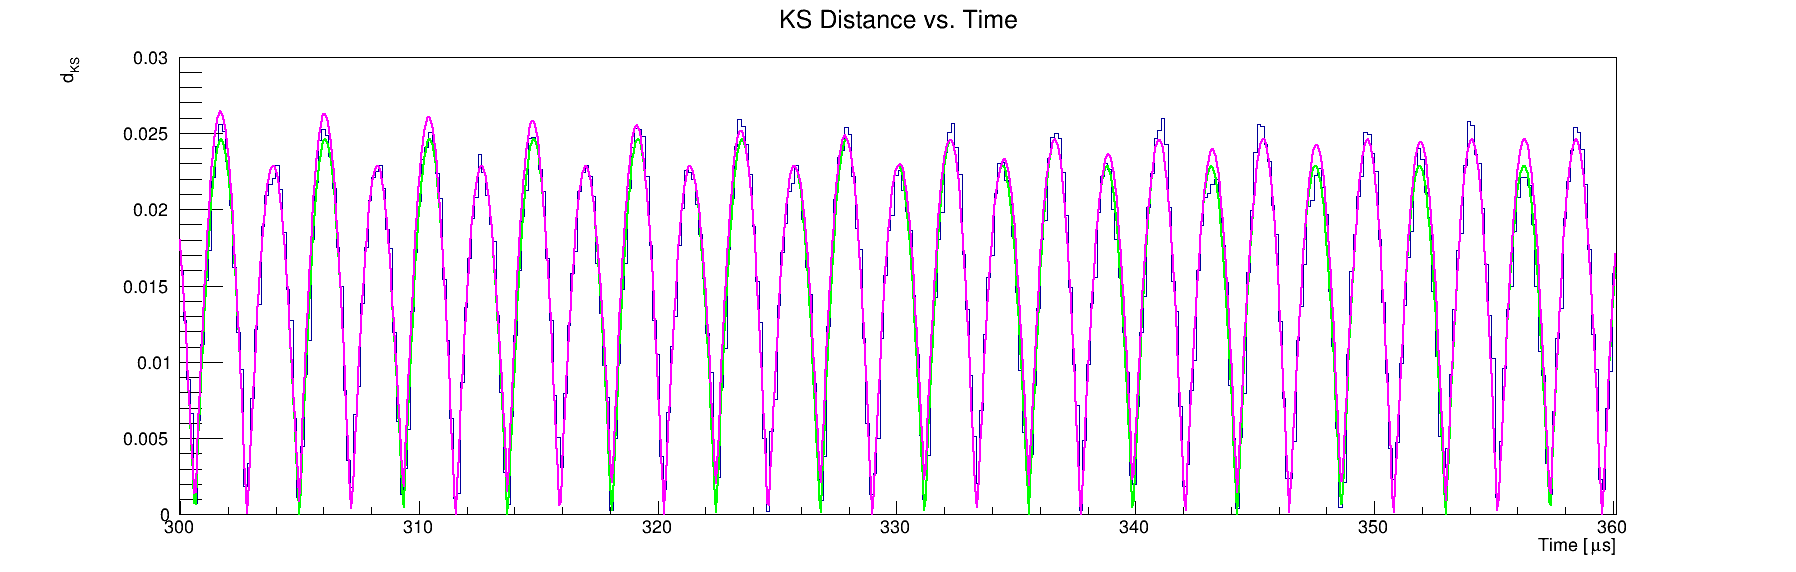

In [48]:
c = r.TCanvas("c","c",1800,600)
hspec4.Draw()
hspec4.GetYaxis().SetRangeUser(0,0.03)
hspec4.GetXaxis().SetRangeUser(300,360)
for i in range(6):
    func4.SetParameter(i, func3.GetParameter(i))  
    print(i, func3.GetParameter(i))
func4.SetParameter(5,0.001)
func4.SetParameter(6,0.37*4)
func4.SetParameter(7,3.14/2)
func4.SetParameter(8,0.001)
func3.Draw("SAME")
func4.Draw("SAME")
c.Draw()

Starting fit: 1
Starting fit: 2
 FCN=0.375133 FROM MINOS     STATUS=SUCCESSFUL    570 CALLS        9677 TOTAL
                     EDM=5.28839e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{1}        2.40366e-02   5.68541e-03  -2.97329e-06   3.49351e-03
   2  R            3.21496e+01   6.49479e+02  -3.12824e-01  -6.59653e-06
   3  #phi_{a}     7.07836e+00   2.40502e-01   9.57584e-05  -1.92301e-02
   4  + C         -5.14508e-04   3.81850e-03  -3.06353e-05   1.44046e-01
   5  A_{2}        8.54514e-04   4.31621e-03  -7.15986e-08  -3.13573e-03
   6  A_{CBO - 2}   6.92355e-05   2.53425e-03   6.94197e-07   3.00028e-02
   7  #omega_{CBO}   1.47272e+00   1.14634e-02  -7.56681e-07   2.10862e-01
   8  #phi_{CBO}   1.73641e+00   2.37738e+00   6.04446e-05   5.09843e-03
   9  A_{CBO - 1}   3.00604e-04   5.21058e-03   5.21058e-03   7.63727e-02
 FCN=

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


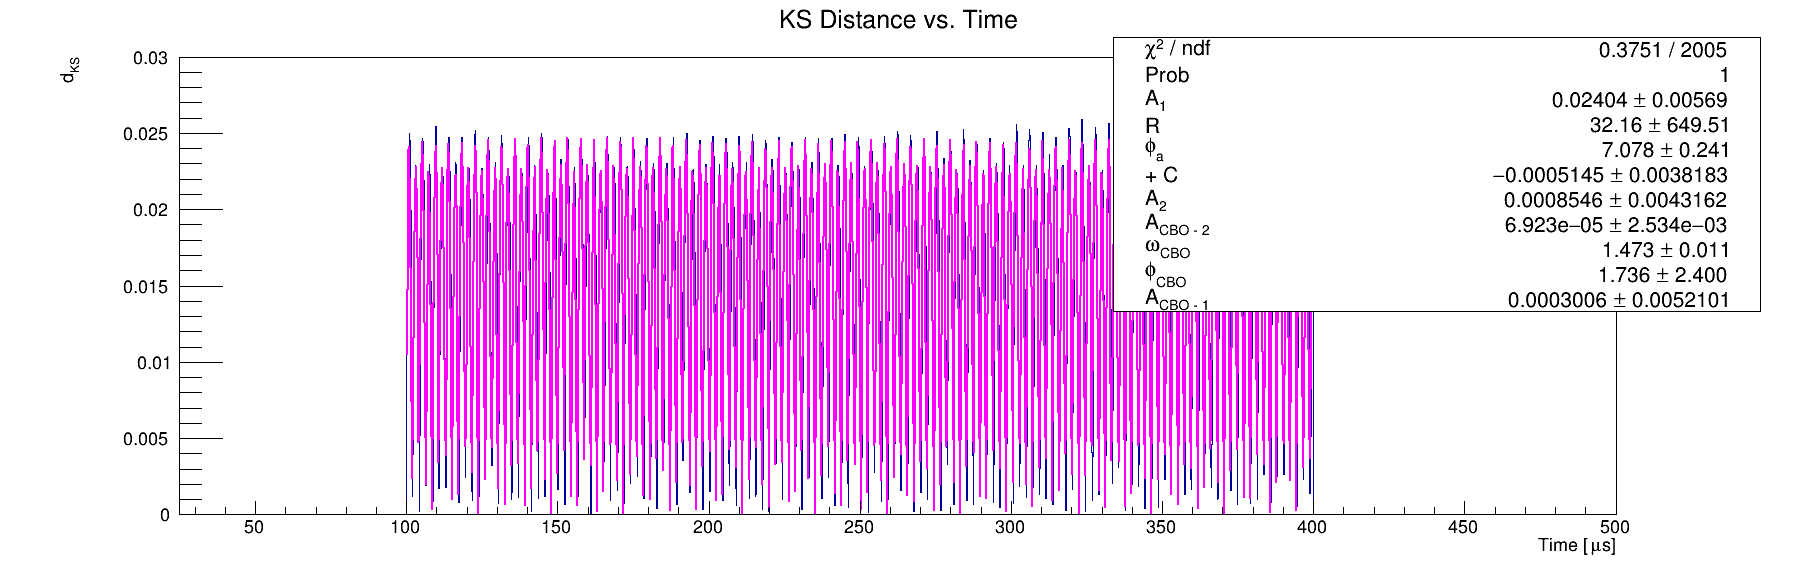

In [49]:
c = r.TCanvas("c","c",1800,600)
hspec4.Draw()
hspec4.GetXaxis().SetRangeUser(25,500)
for i in range(2):
    print("Starting fit:", i+1)
    hspec4.Fit("modsine_cbo","REMB")
c.Draw()

In [50]:
for i in range(9):
    print(func4.GetParameter(i), func4.GetParError(i))

0.024036584782805737 0.0056853857476846514
32.16072632956197 649.506101972774
7.078355452082956 0.2405131789598396
-0.0005144957725623144 0.003818294512508647
0.0008545910033725116 0.004316198449399505
6.923337642827472e-05 0.0025339308075752053
1.4727224709546065 0.011236100378823463
1.7364133817554501 2.4002543860967753
0.0003006070142941445 0.005210124783170511


Creating new Ratio Plot


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


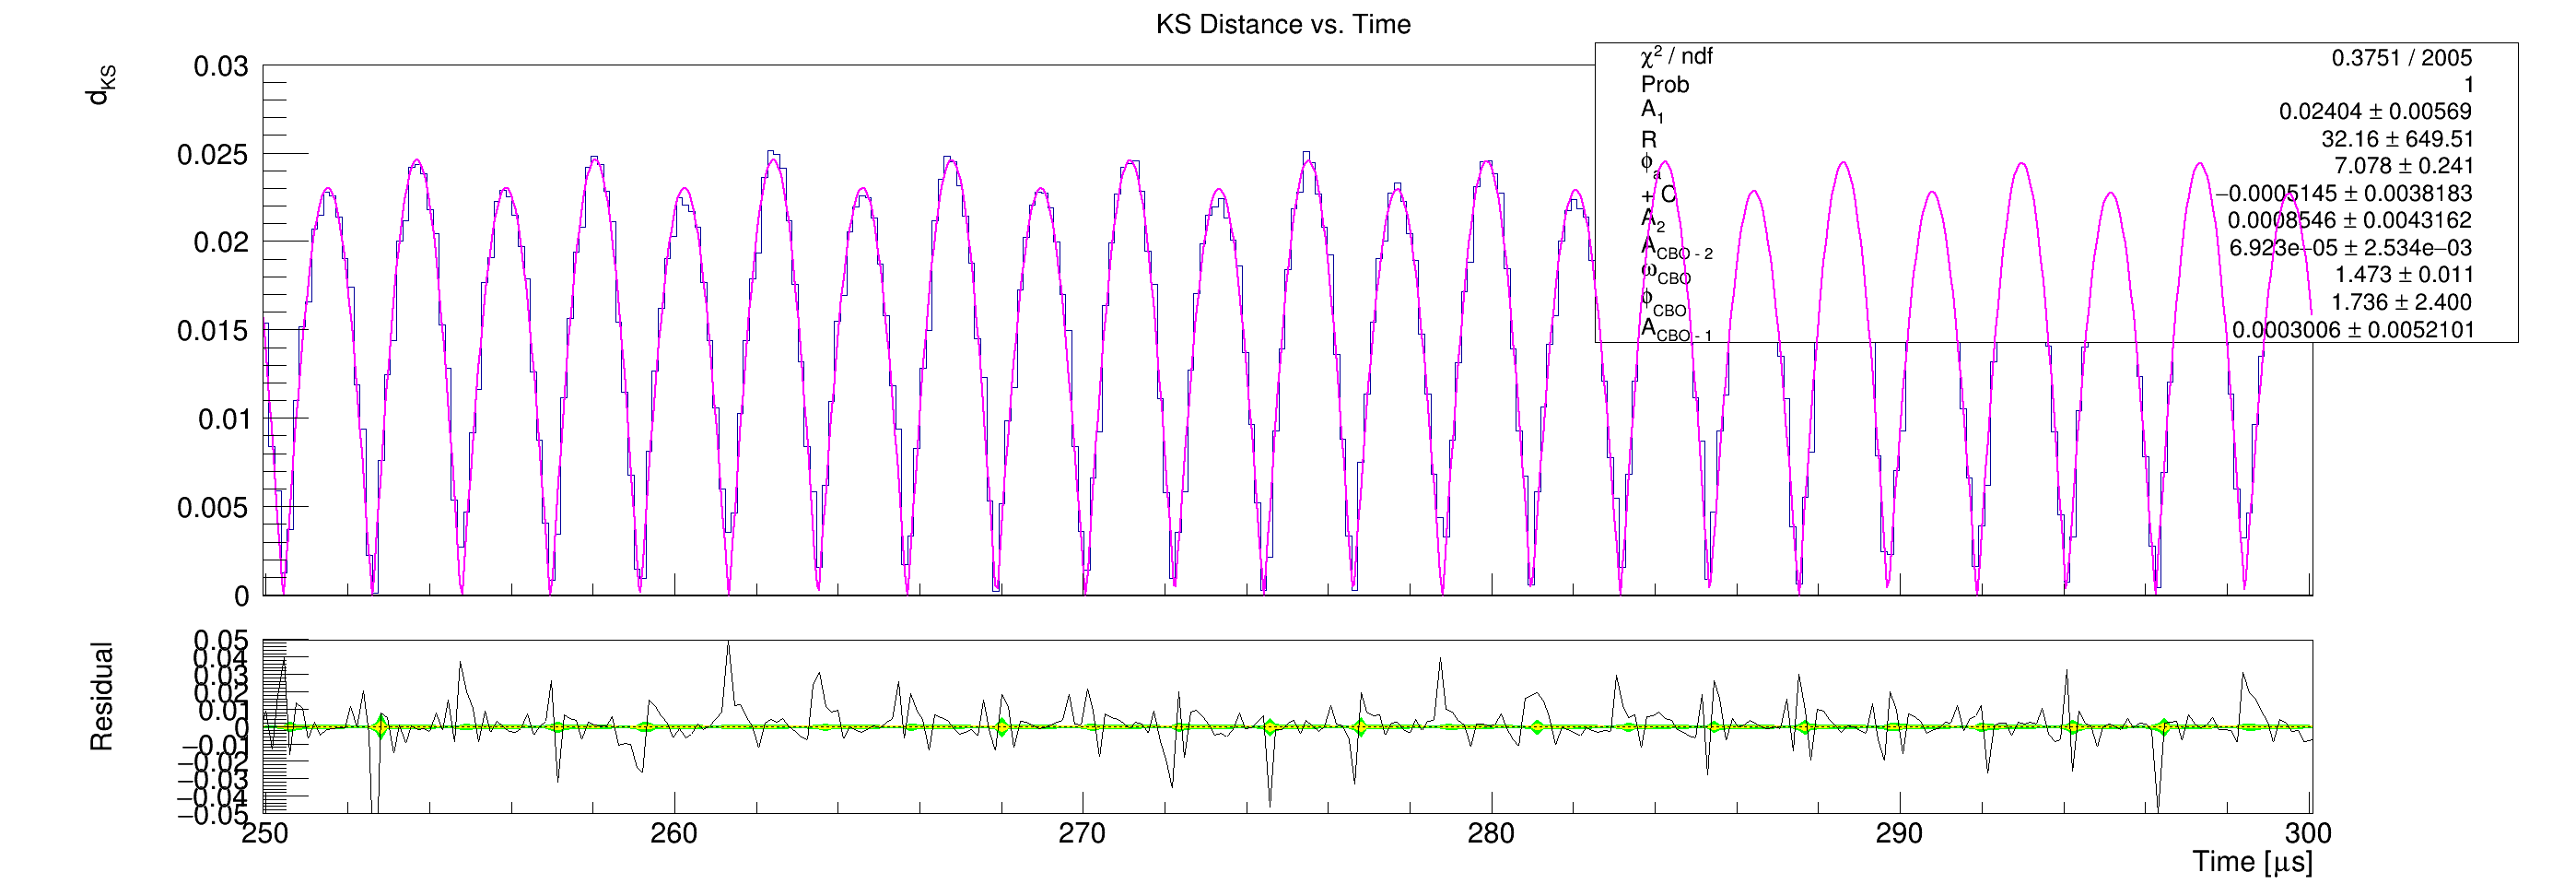

In [51]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas("c","c",2800,1000)
hspec4.Draw()
hspec4.GetXaxis().SetRangeUser(250,300)

c3.Draw()

try:
    rp4.Delete()
except:
    print("Creating new Ratio Plot")

rp4 = r.TRatioPlot(hspec4)
rp4.Draw()
rp4.GetLowerRefYaxis().SetTitle("Residual")
rp4.GetLowerRefYaxis().SetRangeUser(-0.05,0.05)


c3.Update()
c3.Draw()

In [52]:
hspec_resid4 = hspec4.Clone()
hspec_resid4.Reset()
hspec_resid4.SetTitle("Residuals of KS vs. Time Fit")

residVec = []
nBins = hspec4.GetSize() - 2
for i in range(nBins):
    binCenterX = hspec4.GetXaxis().GetBinCenter(i)
    if (binCenterX > t1global and binCenterX < t2global):
        residVec.append( (binCenterX, hspec4.GetBinContent(i) - func4.Eval(binCenterX) ) )
        hspec_resid4.SetBinContent(i, hspec4.GetBinContent(i) - func4.Eval(binCenterX))
    else:
        hspec_resid4.SetBinContent(i, 0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


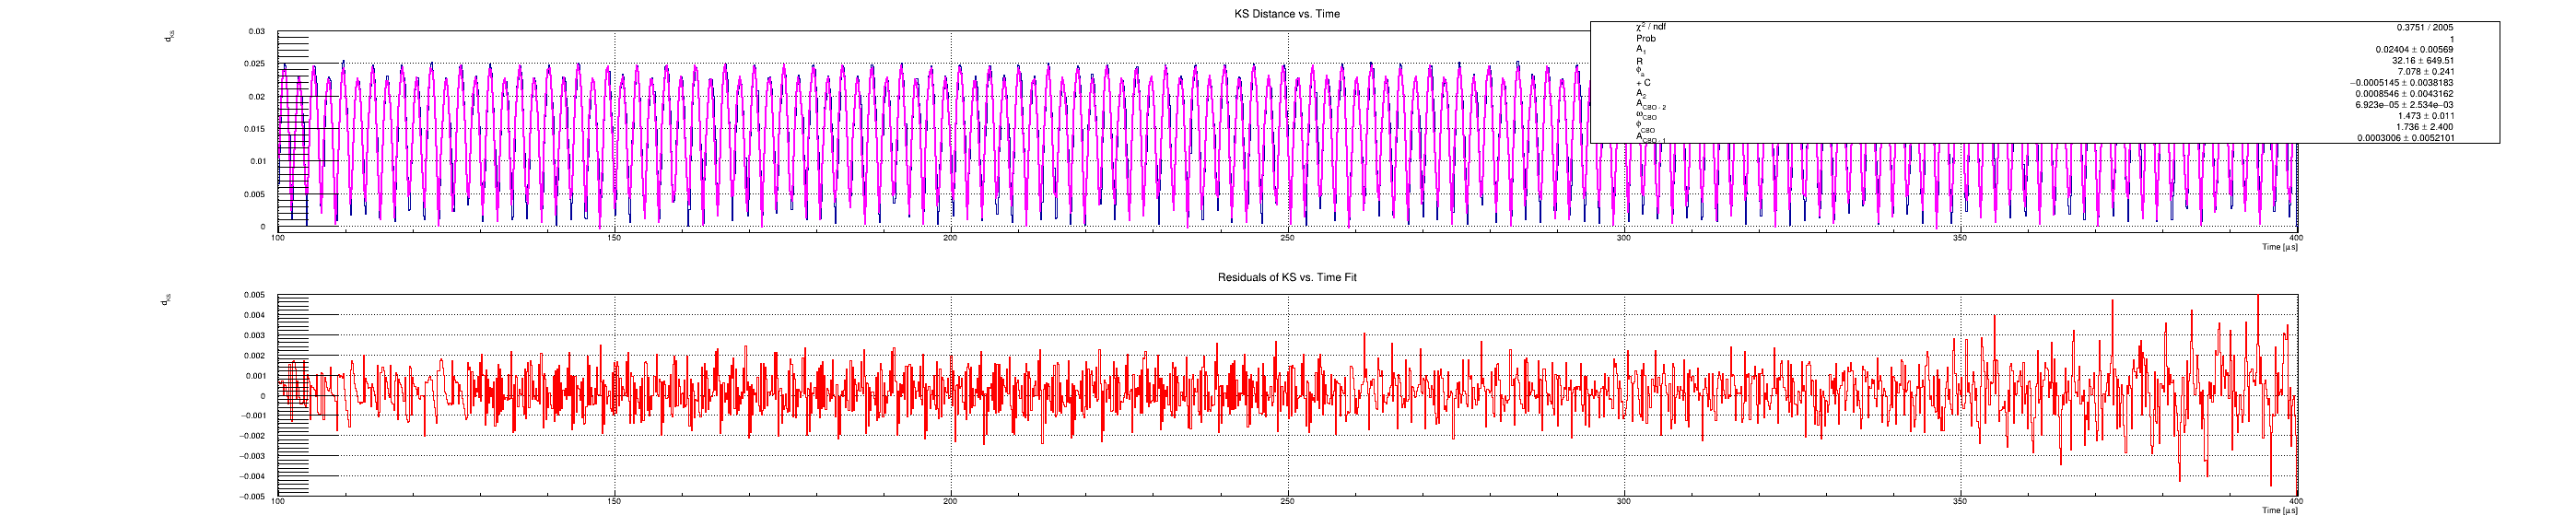

In [53]:
c = r.TCanvas("c","c",2800,600)
x1 = 100
x2 = x1+300
c.Divide(1,2)
c.cd(1)
hspec4.Draw()
hspec4.GetXaxis().SetRangeUser(x1,x2)
hspec4.GetYaxis().SetRangeUser(-0.001,0.03)
r.gPad.SetGrid()
c.cd(2)
hspec_resid4.SetLineColor(2)
hspec_resid4.Draw()
hspec_resid4.GetXaxis().SetRangeUser(x1,x2)
hspec_resid4.GetYaxis().SetRangeUser(-0.005,0.005)
r.gPad.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


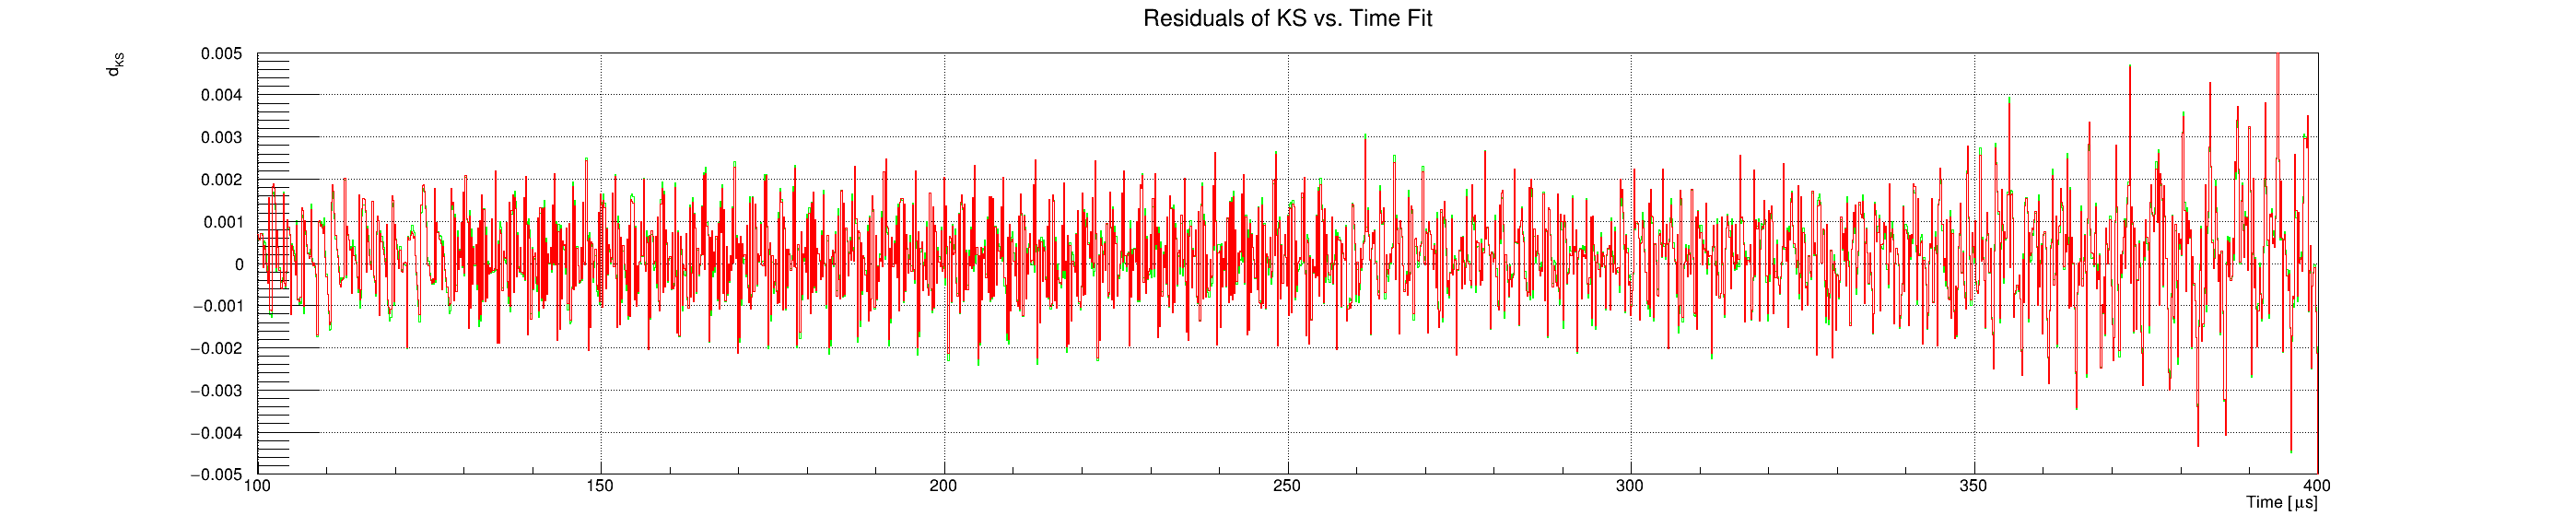

In [54]:
c = r.TCanvas("c","c",2800,600)
x1 = 100
x2 = x1+300

hspec_resid4.SetLineColor(3)
hspec_resid4.Draw()
hspec_resid4.GetXaxis().SetRangeUser(x1,x2)
hspec_resid4.GetYaxis().SetRangeUser(-0.005,0.005)

hspec_resid2.Draw("SAME")

r.gPad.SetGrid()
c.Draw()

---

### Lets now fourier transform this fit function with the CBO term and compare to the non-CBO function

In [55]:
ffthists = [hspec4.Clone(), hspec_resid4.Clone()]

4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715
4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715


Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


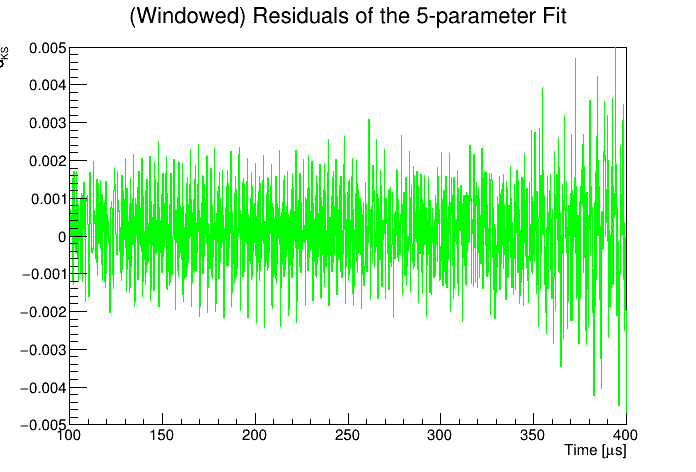

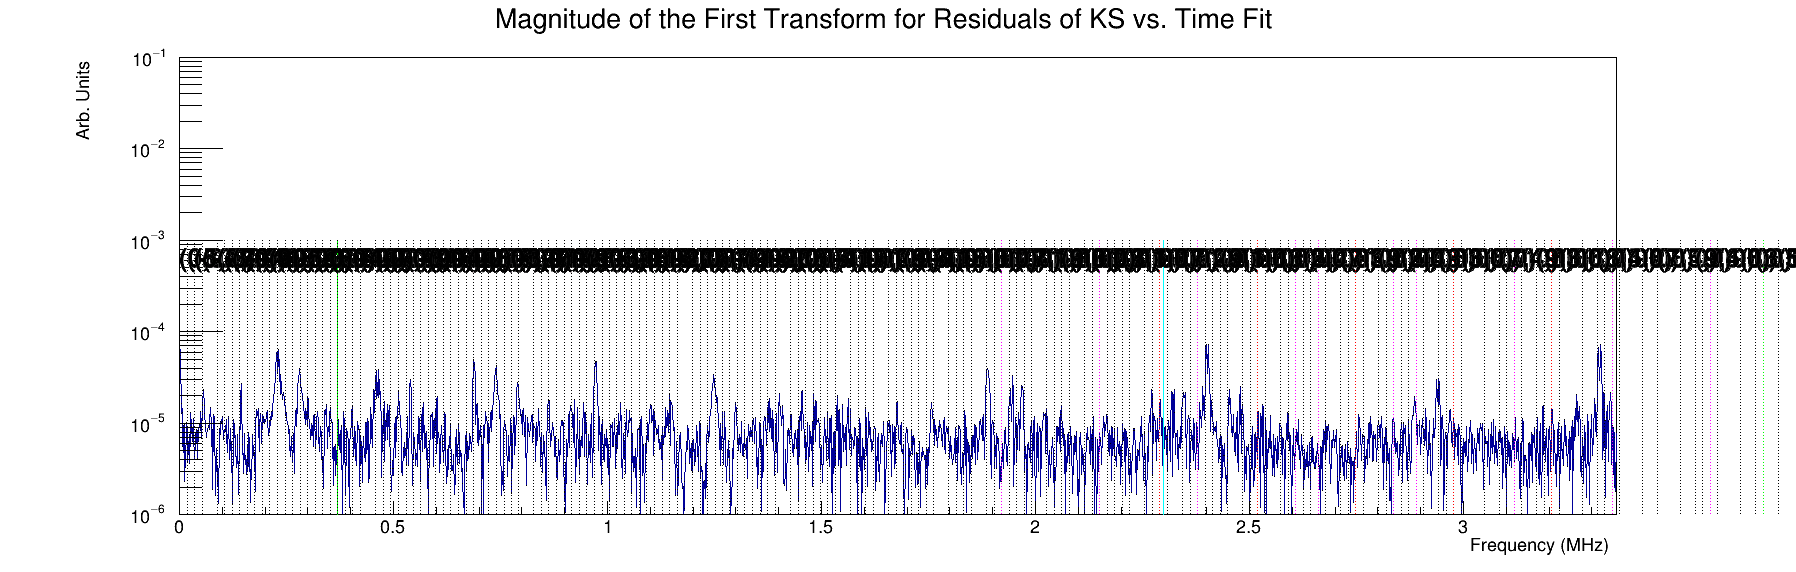

In [56]:
ffts4 = []

for htest in ffthists:
    c3 = r.TCanvas()
    residuals5param = htest.Clone()
    nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

    #apply a windows function to try to get rid of the imaginary peaks
    welchVec = []
    for i in range(nBins):
        unwindowed = residuals5param.GetBinContent(i)
        welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
        welchVec.append(welch)
        residuals5param.SetBinContent(i, unwindowed *  welch)

    residuals5param.Draw()
    residuals5param.GetXaxis().SetRangeUser(t1global,t2global)
    residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
    c3.Draw() 
    
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    hxform = residuals5param.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform for "+(htest.GetTitle()))
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    c2 = r.TCanvas("c2","c2",1800,600)
    c2.cd()
    #c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("HIST P0 L")
    c2.Draw()

    Npart = residuals5param.GetSize() - 2
    minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
    maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10.0,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)
    #hxform.GetXaxis().SetLimits(0,limmax)
    nbins = residuals5param.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    #hxform.GetXaxis().SetRangeUser(0,1.4)

    residuals5paramXform = hxform.Clone()

    hxform.GetYaxis().SetRangeUser(0.000001,0.1)
    
    cboline = r.TLine(0.37,0.000001,0.37,0.001)
    cboline.SetLineColor(3)
    cboline.Draw("SAME")

    vwline = r.TLine(2.3,0.000001,2.3,0.001)
    vwline.SetLineColor(7)
    vwline.Draw("SAME")
    
    oalines = []
    for i in range(1,15):
        oalinei = r.TLine(0.229*i,0.000001,0.229*i,0.001)
        oalinei.SetLineColor(2)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oalines.append(oalinei)
        
    oa_cbo_lines = []
    oa_cbo_lines_pos = []
    oa_cbo_lines_pos_2 = []
    oa_cbo_lines_neg = []
    oa_cbo_lines_allCombos = []
    ttvec = []
    for i in range(1,15):
        oalinei = r.TLine(0.37*i,0.000001,0.37*i,0.001)
        oalinei.SetLineColor(3)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oa_cbo_lines.append(oalinei)
    for i in range(1,15):
        oalinei = r.TLine(0.229*i+0.37,0.000001,0.229*i+0.37,0.001)
        oalinei.SetLineColor(6)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oa_cbo_lines_pos.append(oalinei)
    for i in range(1,15):
        oalinei = r.TLine(0.229+0.37*i,0.000001,0.229+0.37*i,0.001)
        oalinei.SetLineColor(12)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oa_cbo_lines_pos_2.append(oalinei)
    for i in range(2,15):
        oalinei = r.TLine(0.229*i-0.37,0.000001,0.229*i-0.37,0.001)
        oalinei.SetLineColor(6)
        oalinei.SetLineStyle(3)
        oalinei.Draw()
        oa_cbo_lines_neg.append(oalinei)
    for i in range(-10,10):
        for j in range(-10,10):
            for k in range(0,1):
                if(0.229*i+0.37*j+2.3*k < 0):
                    continue
                oalinei = r.TLine(0.229*i+0.37*j+2.3*k,0.000001,0.229*i+0.37*j+2.3*k,0.001)
                oalinei.SetLineColor(1)
                oalinei.SetLineStyle(3)
                oalinei.Draw()
                oa_cbo_lines_allCombos.append(oalinei)

                tt = r.TText(.229*i+0.37*j+2.3*k,0.0005,"("+str(i)+","+str(j)+","+str(k)+")")
                ttvec.append(tt)
                tt.Draw()

    c2.SetLogy()
    c2.Draw()
    
    ffts4.append(hxform.Clone())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


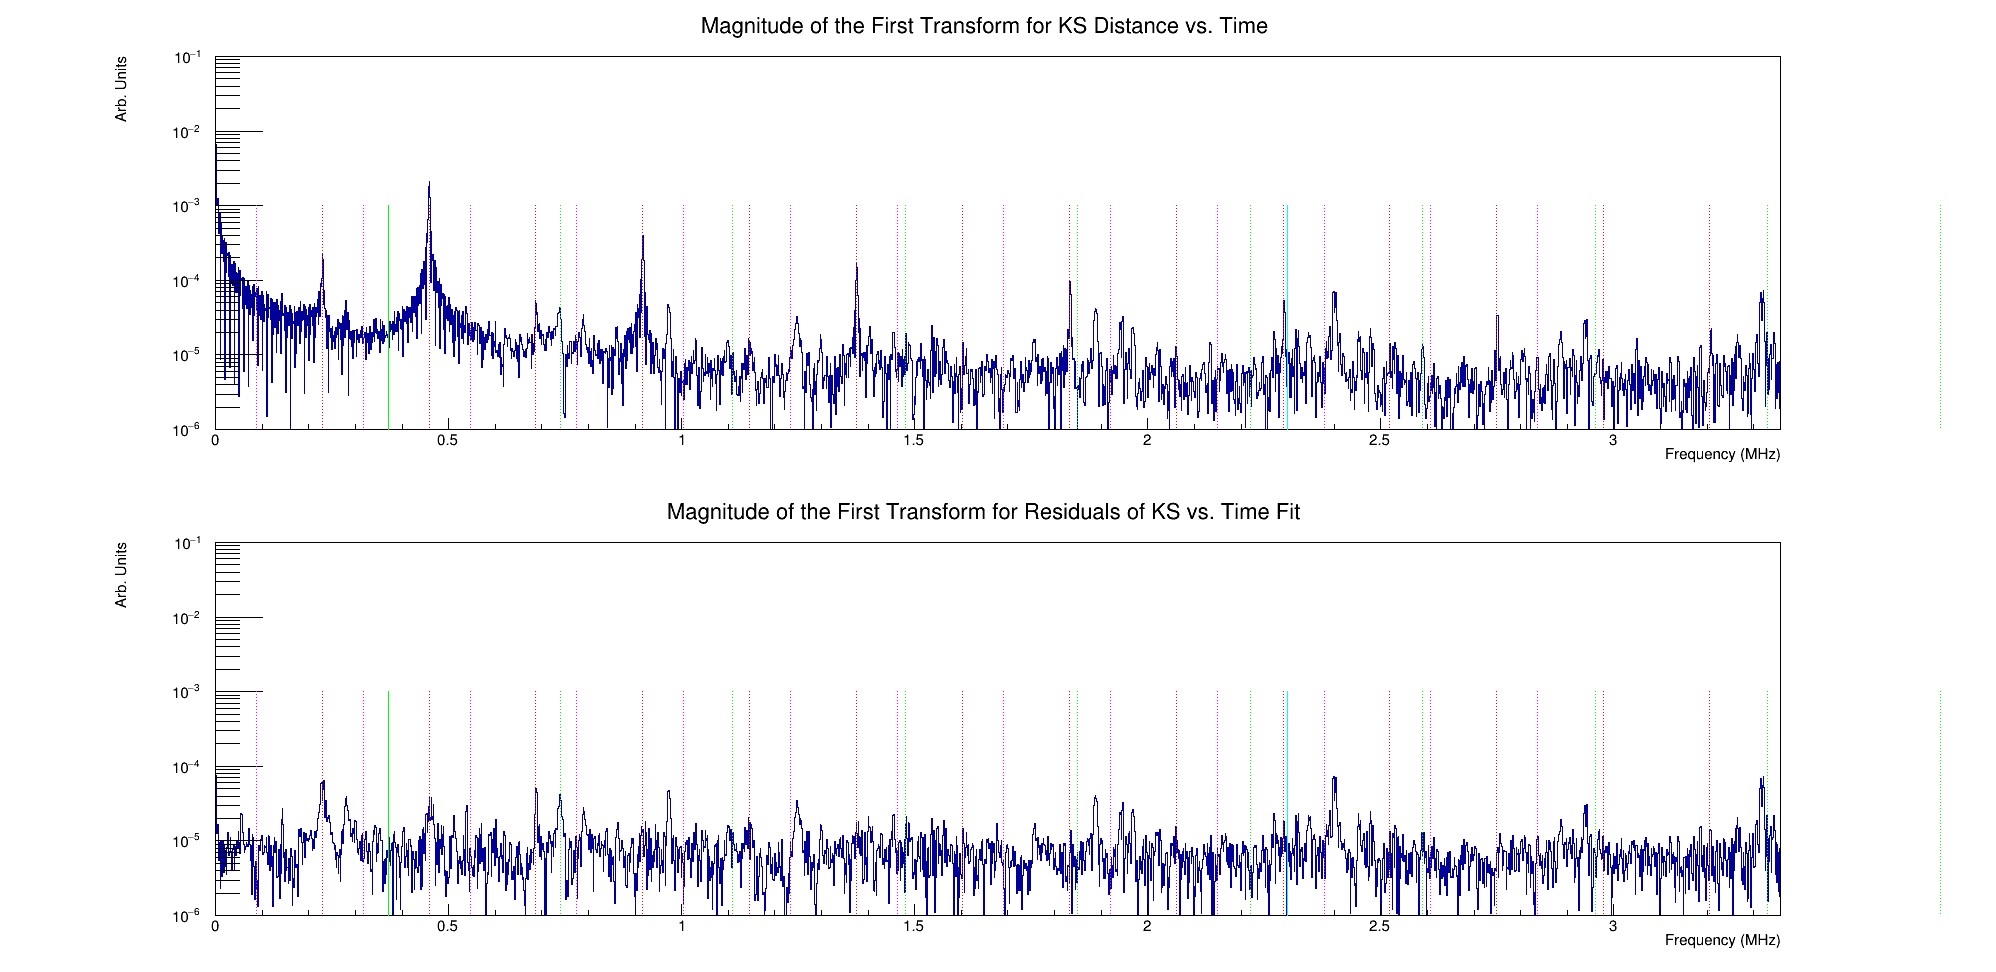

In [57]:
c = r.TCanvas("c","c",2000,1000)
c.Divide(1,2)
for i, h in enumerate(ffts4):
    c.cd(i+1)
    r.gPad.SetLogy()
    h.Draw("hist")
    
    cboline.Draw("SAME")
    vwline.Draw("SAME")
    for oalinei in oalines:
        oalinei.Draw("SAME")
    for oalinei in oa_cbo_lines:
        oalinei.Draw("SAME")
    for oalinei in oa_cbo_lines_neg:
        oalinei.Draw("SAME")
    
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


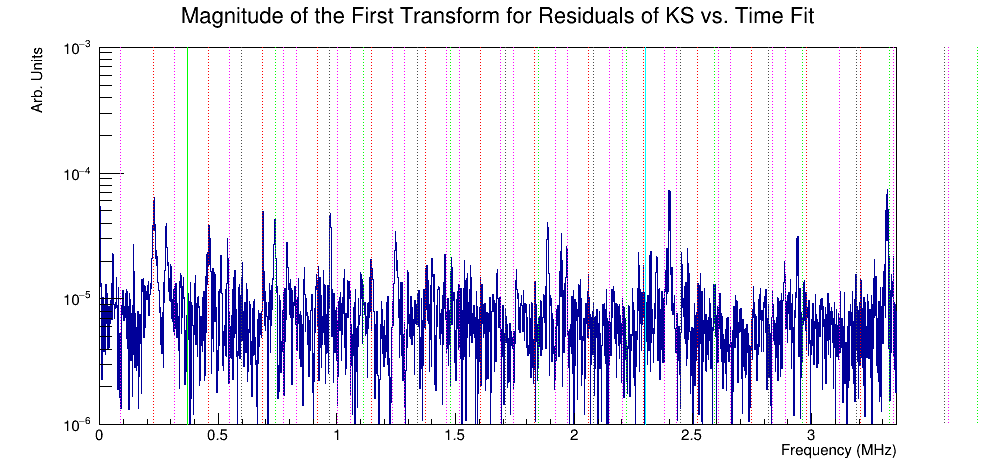

In [58]:
c = r.TCanvas("c","c",1000,500)

r.gPad.SetLogy()
#ffts[1].Draw("hist")
#ffts4[1].SetLineColor(1)
ffts4[1].Draw("hist same")
h.GetYaxis().SetRangeUser(0.000001,0.001)

cboline.Draw("SAME")
vwline.Draw("SAME")
for oalinei in oalines:
    oalinei.Draw("SAME")
for oalinei in oa_cbo_lines:
    oalinei.Draw("SAME")
for oalinei in oa_cbo_lines_pos:
    oalinei.Draw("SAME")
for oalinei in oa_cbo_lines_neg:
    oalinei.Draw("SAME")
for oalinei in oa_cbo_lines_pos_2:
    oalinei.Draw("SAME")
    
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


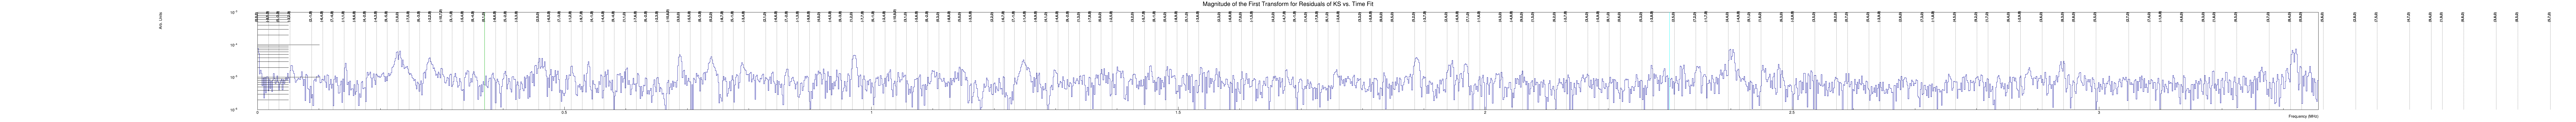

In [59]:
c = r.TCanvas("c","c",10000,500)

r.gPad.SetLogy()
#ffts[1].Draw("hist")
#ffts4[1].SetLineColor(1)
ffts4[1].Draw("hist same")
h.GetYaxis().SetRangeUser(0.000001,0.001)

cboline.Draw("SAME")
vwline.Draw("SAME")
for oalinei in oa_cbo_lines_allCombos:
    oalinei.Draw("SAME")
    
for tt in ttvec:
    tt.SetTextSize(0.03)
    tt.SetTextAngle(90)
    tt.Draw("SAME")
    
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


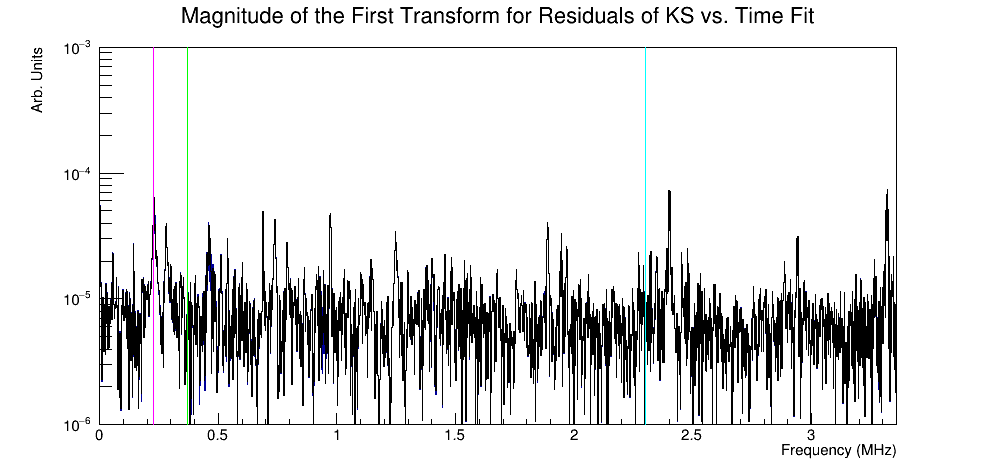

In [60]:
c = r.TCanvas("c","c",1000,500)

r.gPad.SetLogy()
ffts[1].Draw("hist")
ffts4[1].SetLineColor(1)
ffts4[1].Draw("hist same")
h.GetYaxis().SetRangeUser(0.000001,0.001)

cboline.Draw("SAME")
vwline.Draw("SAME")

ocbo = 0.37
oa = 0.229
ovw = 2.3

xfreq = ( ocbo*0
         + oa*1
         + ovw*0
        )

xline = r.TLine(xfreq,0.000001,xfreq,0.001)
xline.SetLineColor(6)
xline.Draw("SAME")

c.Draw()